In [1]:
"""
The goal of this code is to provide a good offensive identity for every NBA player. It does so via clustering techniques.

Why is this valuable:
(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market
may be able to fill in a hole created by a player leaving in free agency
(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used

"""

'\nThe goal of this code is to provide a good offensive identity for every NBA player. It does so via clustering techniques.\n\nWhy is this valuable:\n(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market\nmay be able to fill in a hole created by a player leaving in free agency\n(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used\n\n'

In [2]:
#Mathematical tools
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns

In [3]:
#Machine learning tools
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
#Read data into dataframe
raw_data = {}
raw_data["isolation"] = pd.read_csv("isolation.csv")
raw_data["cut"] = pd.read_csv("cut.csv")
raw_data["off_screen"] = pd.read_csv("OffScreen.csv")
raw_data["PnR_handler"] = pd.read_csv("PandRBallHandler.csv")
raw_data["PnR_roller"] = pd.read_csv("PandRRoller.csv")
raw_data["post_up"] = pd.read_csv("PostUp.csv")
raw_data["spot_up"] = pd.read_csv("SpotUp.csv")

players = {}
#Getting rid of NaN row, team name, and player name
for type in raw_data.keys():
    raw_data[type] = raw_data[type].drop([0, 0])
    raw_data[type] = raw_data[type].drop(columns=["TEAM"])
    players[type] = raw_data[type]["PLAYER"]
    raw_data[type] = raw_data[type].drop(columns=["PLAYER"])
    
    column_names = []
    for stat in raw_data[type].columns:
        column_names.append(stat + "_" + type)

    raw_data[type].columns = column_names
        

In [5]:
#Let's bring everything to the same scale before clustering.
normalized_data = {}
for key in raw_data.keys():
    normalized_data[key] = pd.DataFrame(StandardScaler().fit_transform(raw_data[key]))
    normalized_data[key] = pd.DataFrame(normalize(normalized_data[key]))

In [6]:
print(raw_data["isolation"].columns)

Index(['GP_isolation', 'POSS_isolation', 'FREQ%_isolation', 'PPP_isolation',
       'PTS_isolation', 'FGM_isolation', 'FGA_isolation', 'FG%_isolation',
       'EFG%_isolation', 'FT_isolation', 'TOV_isolation', 'SF_isolation',
       'AND ONE_isolation', 'SCORE_isolation', 'PERCENTILE_isolation'],
      dtype='object')


/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

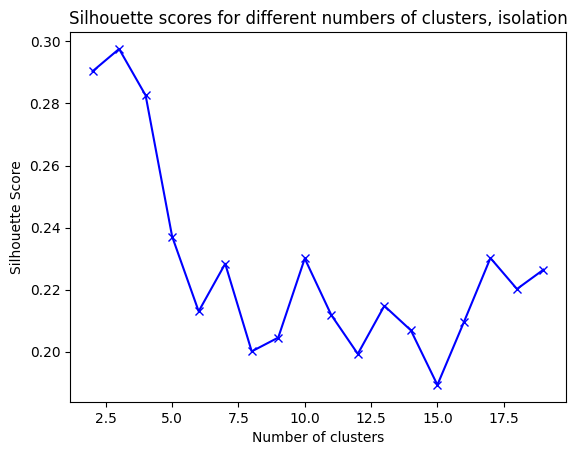

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

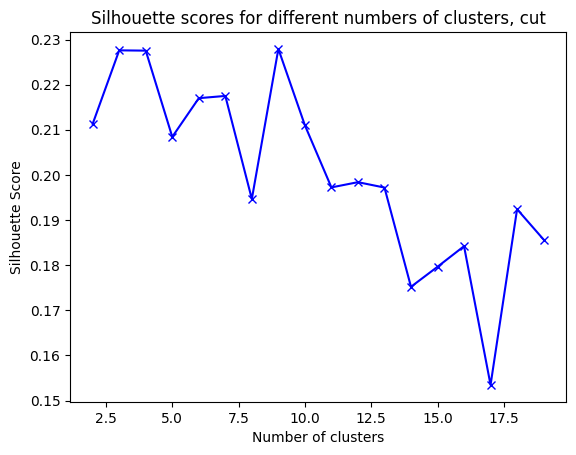

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

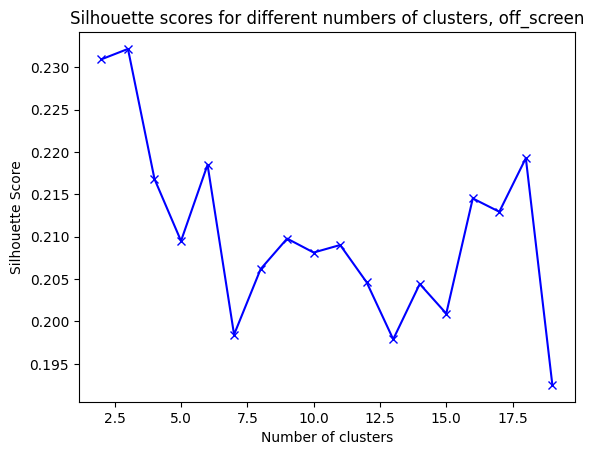

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

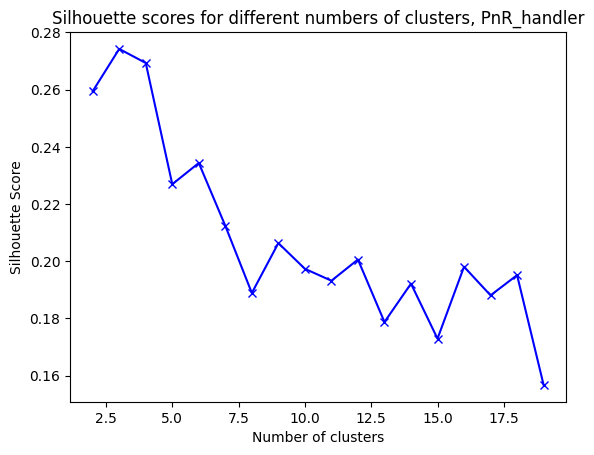

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

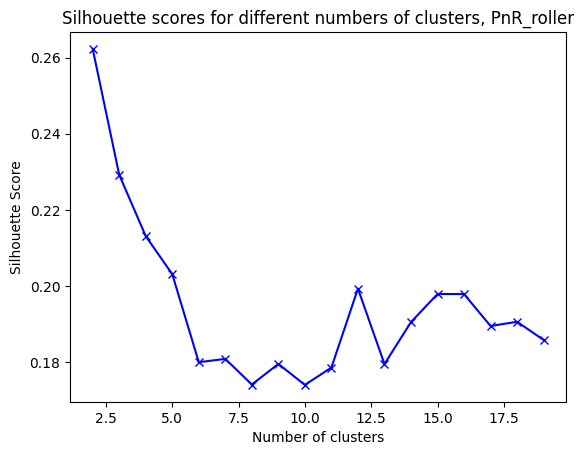

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

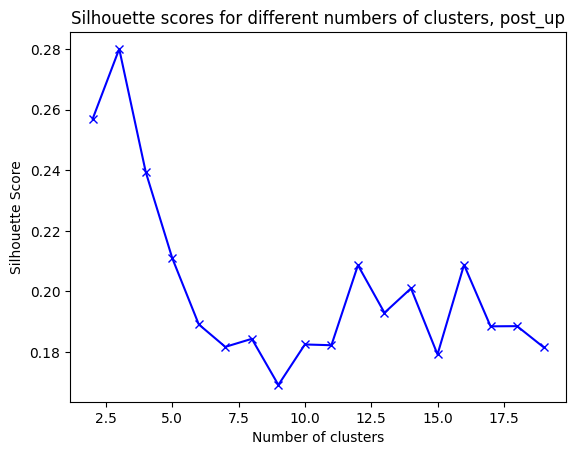

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

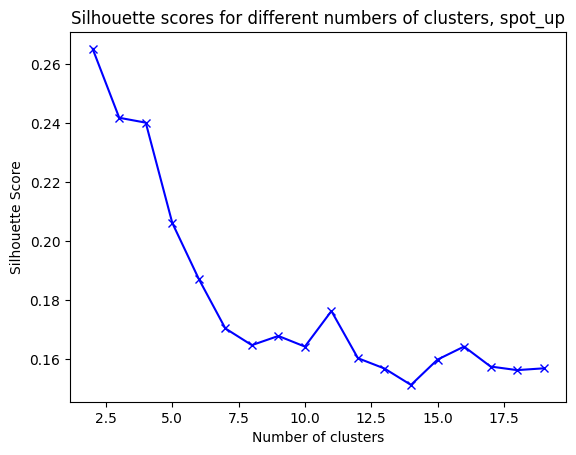

In [7]:
"""
Let's determine the optimal number of clusters via the silhouette method for each play type

"""
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(normalized_data[key])
        cluster_labels = kmeans.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], cluster_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [8]:
"""
Checking the maximums, we get the following cluster numbers.
"""
num_clusters = {
    "isolation": 3,
    "cut": 3,
    "off_screen":3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3,
    "spot_up": 2
}

In [9]:
#We can now start training the KMeans models.
models = {}
for key in normalized_data.keys():
    models[key] = KMeans(n_clusters=num_clusters[key])
    models[key].fit(normalized_data[key])

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

In [10]:
#Get the labels from KMeans clustering
labels_kmeans = {}
for key in models.keys():
    labels_kmeans[key] = pd.DataFrame(models[key].labels_)
    

In [11]:
"""
The data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. 
We'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. 
"""

"\nThe data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. \nWe'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. \n"

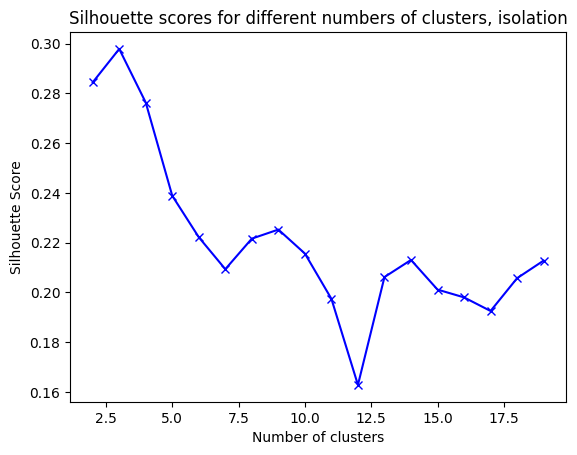

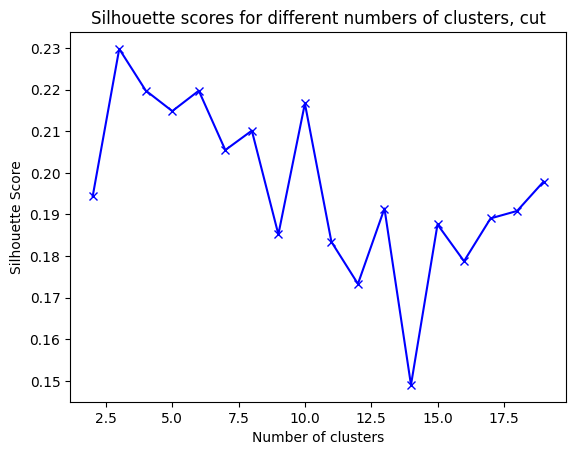

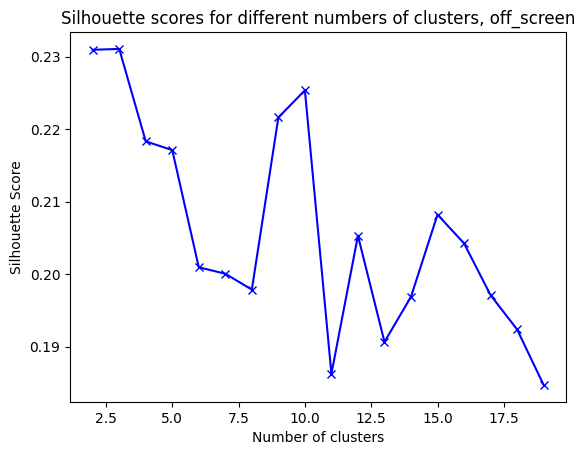

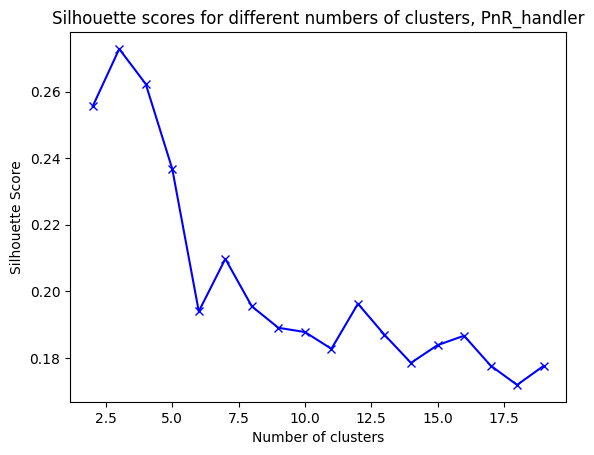

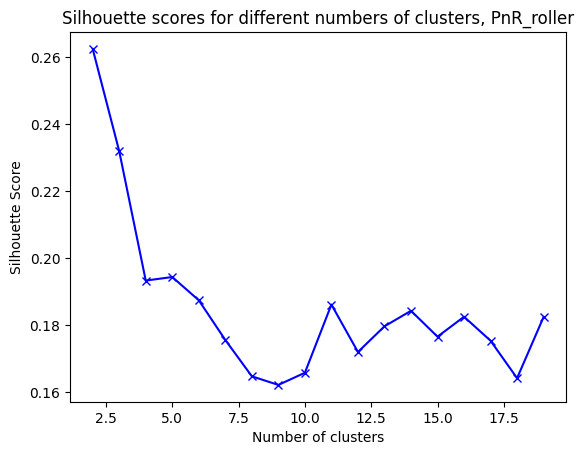

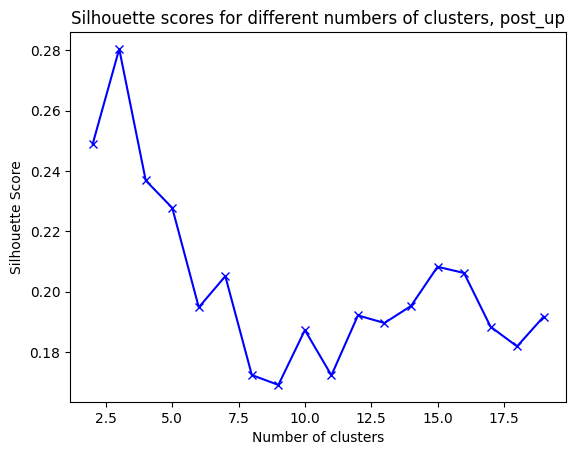

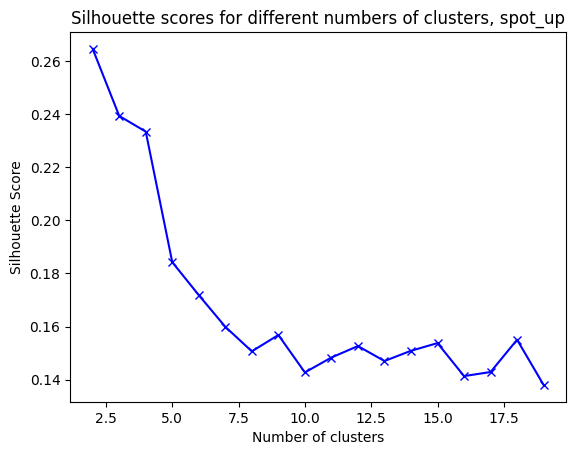

In [12]:
#First, determine the number of clusters via the silhouette scores
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        spectral_model_rbf = SpectralClustering(n_clusters=i)
        spectral_model_rbf.fit(normalized_data[key])
        spectral_model_rbf_labels = spectral_model_rbf.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], spectral_model_rbf_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [13]:
num_clusters_spectral = {
    "isolation": 3,
    "cut": 3,
    "off_screen": 3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3, 
    "spot_up": 2
}

In [14]:
#We can now start training the RBF spectral clustering models.
spectral_rbf_models = {}
for key in normalized_data.keys():
    spectral_rbf_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="rbf")
    spectral_rbf_models[key].fit(normalized_data[key])

In [15]:
#Get the labels 
labels_rbf = {}
for key in spectral_rbf_models.keys():
    labels_rbf[key] = pd.DataFrame(spectral_rbf_models[key].labels_)
    

In [16]:
#Let's train the nearest neighbor models next
spectral_nn_models = {}
for key in normalized_data.keys():
    spectral_nn_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="nearest_neighbors")
    spectral_nn_models[key].fit(normalized_data[key])

In [17]:
#Get the labels 
labels_nn = {}
for key in spectral_nn_models.keys():
    labels_nn[key] = pd.DataFrame(spectral_nn_models[key].labels_)
    

In [18]:
#Let's try to compute the Davies-Bouldin score for all these models. For each given type of model, we'll take the average over all play type models.
kmeans_scores = []
for key in models.keys():
    kmeans_scores.append(davies_bouldin_score(normalized_data[key], labels_kmeans[key].values.ravel()))
print("KMeans average: " + str(np.mean(kmeans_scores)))

rbf_scores = []
for key in spectral_rbf_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_rbf[key].values.ravel()))
print("Spectral RBF average: " + str(np.mean(rbf_scores)))

nn_scores = []
for key in spectral_nn_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_nn[key].values.ravel()))
print("Spectral NN average: " + str(np.mean(rbf_scores)))
            
    

KMeans average: 1.4240175352908355
Spectral RBF average: 1.4077190134870137
Spectral NN average: 1.4186594749559875


In [19]:
"""
First, let's investigate the isolation clusters. 
"""

"\nFirst, let's investigate the isolation clusters. \n"

In [20]:
#Let's join together the cluster labels, raw data, and player names to see what clusters each player belongs to. 
output = {}
raw_data_with_constant = {}
for key in raw_data.keys():
    output[key] = raw_data[key]
    raw_data[key]["LABEL"] = models[key].labels_
    raw_data[key]["PLAYER"] = players[key]
    raw_data_with_constant[key] = raw_data[key]
    raw_data_with_constant[key]["Constant"] = "" * len(raw_data_with_constant[key])

[Text(0.5, 1.0, 'Isolation Clusters')]

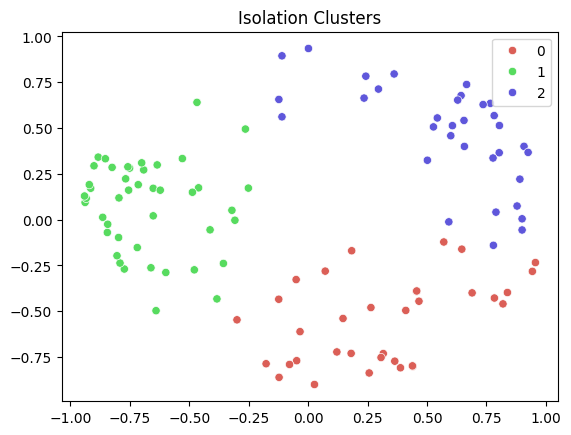

In [21]:
#Use PCA to project clusters into 2-space
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["isolation"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["isolation"]),
    legend="full",
    hue=models["isolation"].labels_
).set(title="Isolation Clusters")

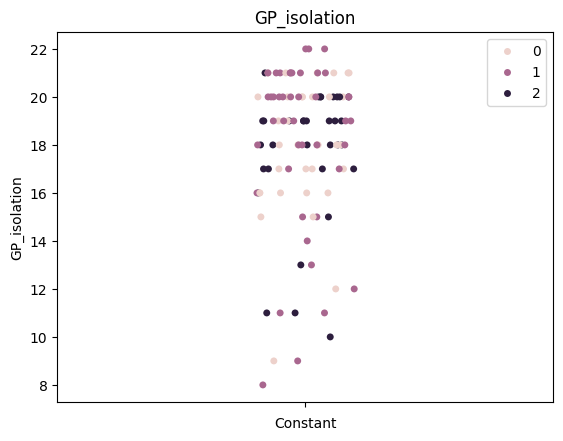

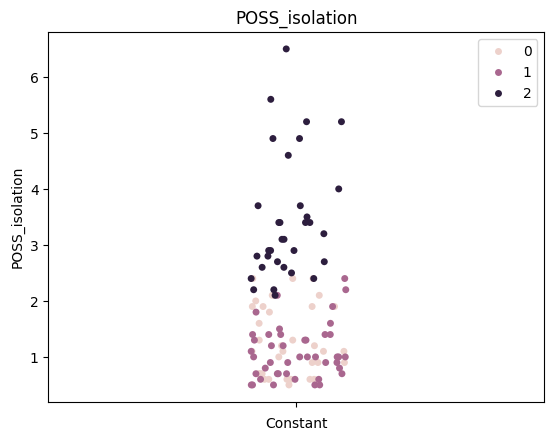

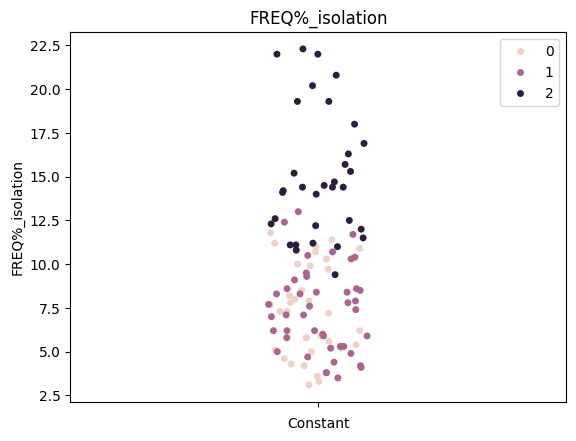

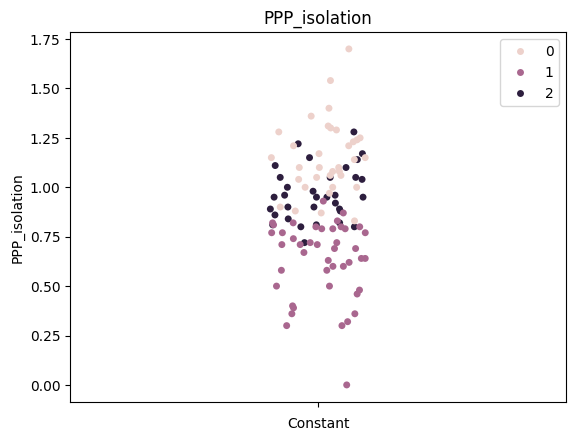

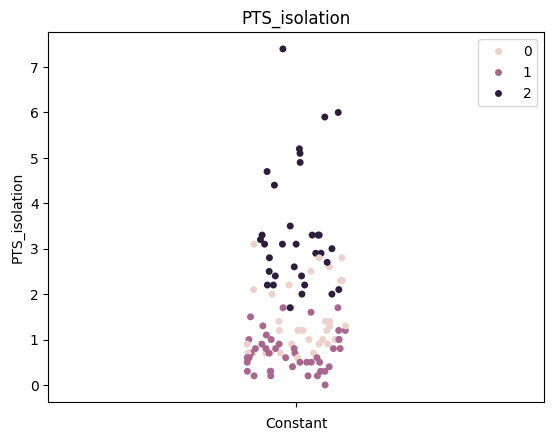

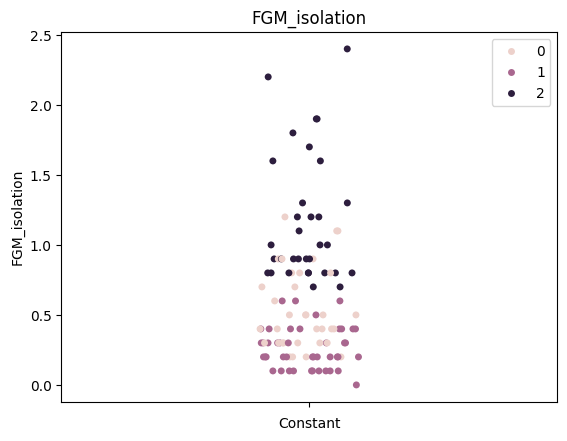

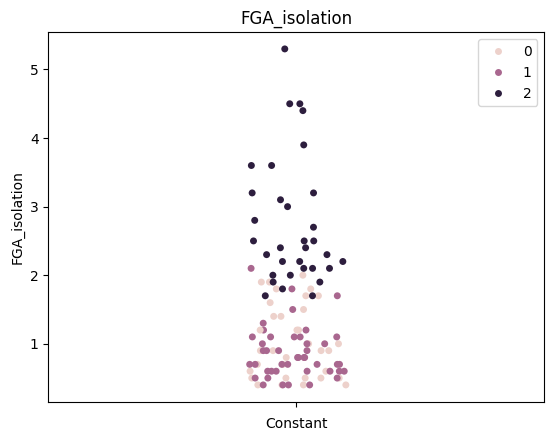

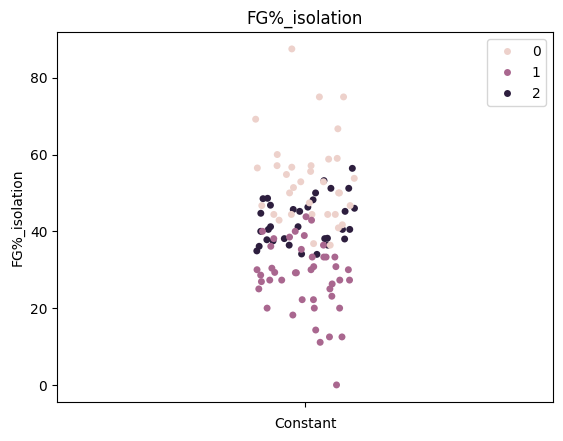

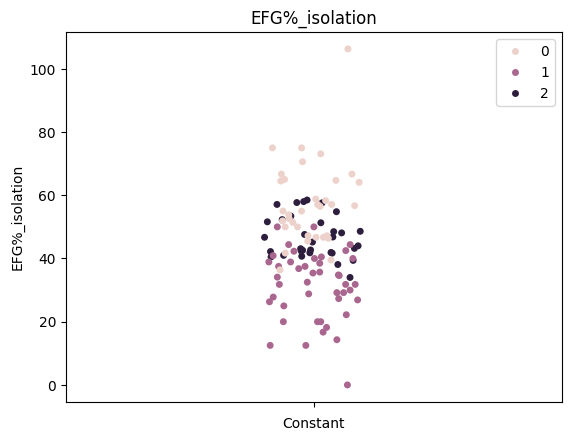

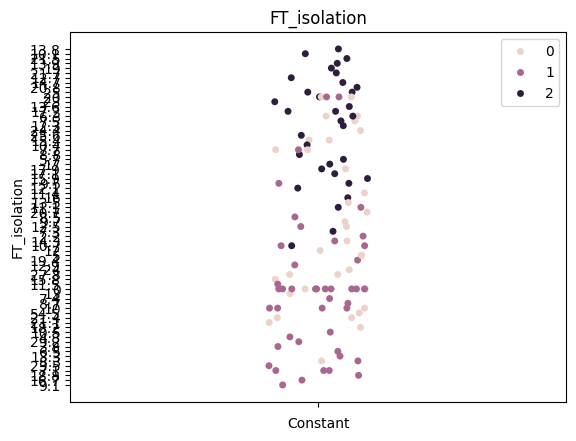

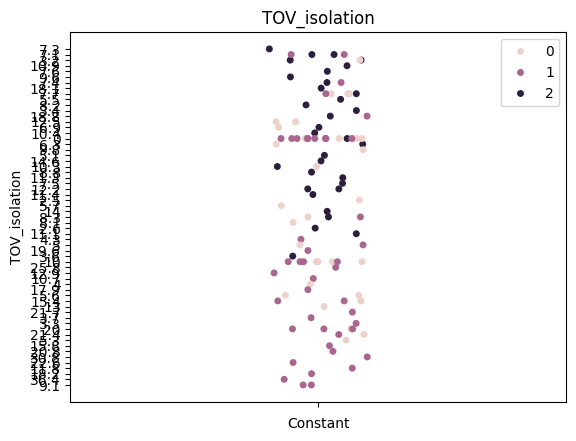

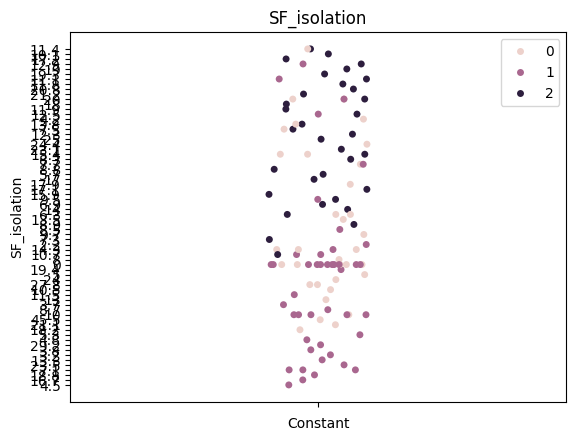

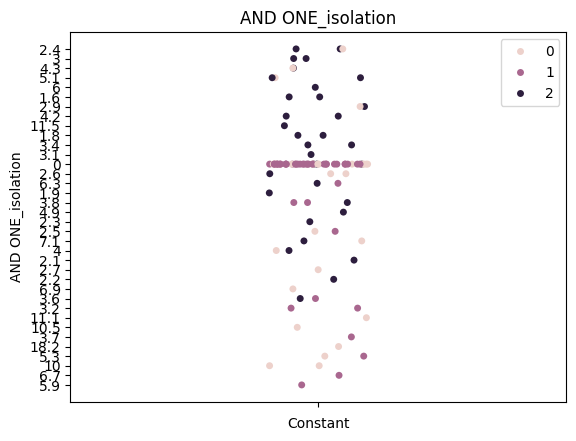

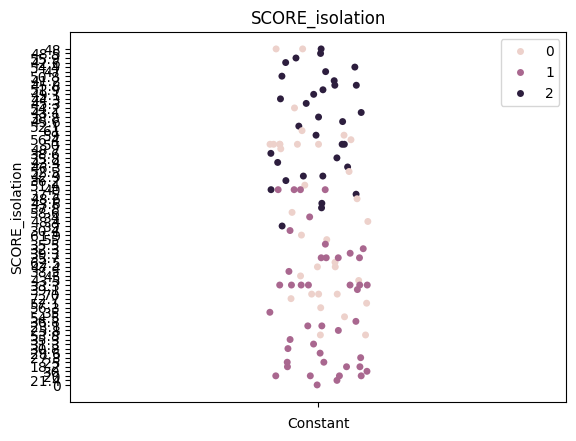

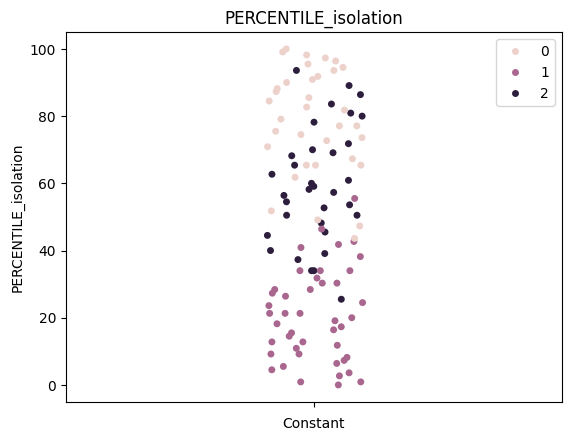

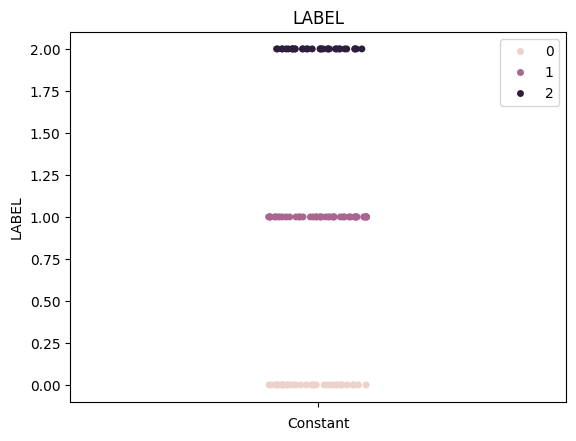

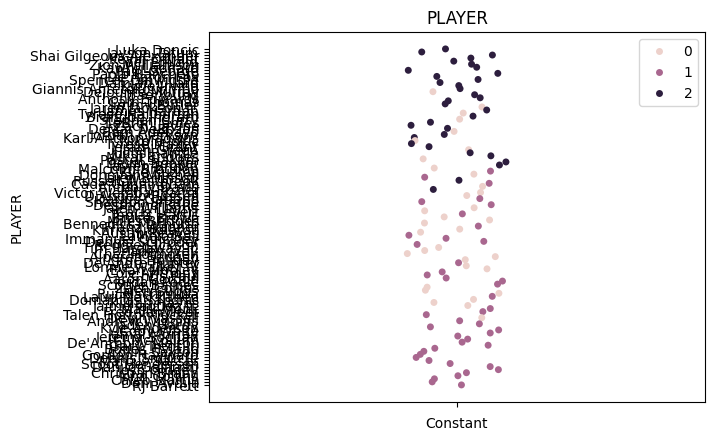

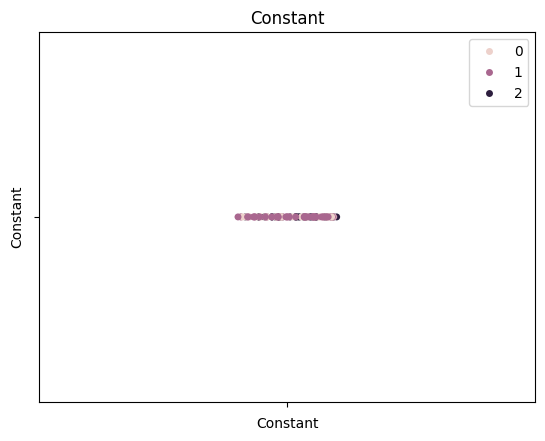

In [22]:
#Visualizing how iso clusters vary over different stats
for key in raw_data["isolation"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["isolation"]['Constant'],y=raw_data_with_constant["isolation"][key],hue=models["isolation"].labels_,jitter=True).set(title=key)

In [23]:
#Let's see players who belong to cluster 0 in iso plays.
print(output["isolation"][output["isolation"]["LABEL"] == 0]["PLAYER"])

15       Dejounte Murray
20     Jaren Jackson Jr.
22     Tyrese Haliburton
24         Stephen Curry
28           Bam Adebayo
31          Nikola Jokic
34           Jalen Green
37         Pascal Siakam
40       Malcolm Brogdon
42      Donovan Mitchell
46         Anthony Davis
48     Victor Wembanyama
49      D'Angelo Russell
53        Jalen Williams
54          Caris LeVert
56           Bruce Brown
57         Miles Bridges
58    Bennedict Mathurin
60       Khris Middleton
61         Austin Reaves
66      Tim Hardaway Jr.
67            Jaden Ivey
68         Chet Holmgren
69        Alperen Sengun
70          Jrue Holiday
72      Lonnie Walker IV
73           Evan Mobley
79          Zach Collins
80           Jalen Suggs
81         Rui Hachimura
83      Domantas Sabonis
84         Killian Hayes
85      Jaime Jaquez Jr.
89         Devin Vassell
Name: PLAYER, dtype: object


In [24]:
#Now let's see players who belong to cluster 1 in iso plays.
print(output["isolation"][output["isolation"]["LABEL"] == 1]["PLAYER"])

41              Kyle Kuzma
43           Jalen Brunson
45         Cade Cunningham
50          Darius Garland
51          Shaedon Sharpe
52            Desmond Bane
55           Tobias Harris
59            Franz Wagner
62             LaMelo Ball
63       Immanuel Quickley
64         Dennis Schroder
65          Reggie Jackson
71         De'Andre Hunter
74            Cole Anthony
75              Chris Paul
76            Aaron Gordon
77            Jordan Poole
78          Scottie Barnes
82         Lauri Markkanen
86              Malik Monk
87           Fred VanVleet
88     Talen Horton-Tucker
90          Andrew Wiggins
91             Jaden Hardy
92           Kyle Anderson
93              Coby White
94            Jamal Murray
95           Jeremy Sochan
96             CJ McCollum
97       De'Anthony Melton
98          Gary Trent Jr.
99            Bones Hyland
100          Collin Sexton
101         Gordon Hayward
102       Dennis Smith Jr.
103          Marcus Sasser
104        Scoot Henderson
1

In [25]:
#Now cluster 2
print(output["isolation"][output["isolation"]["LABEL"] == 2]["PLAYER"])

1                 Luka Doncic
2                Jayson Tatum
3     Shai Gilgeous-Alexander
4                Kevin Durant
5                 Joel Embiid
6             Zion Williamson
7               Kawhi Leonard
8                 Paul George
9              Paolo Banchero
10               De'Aaron Fox
11          Spencer Dinwiddie
12             Damian Lillard
13               Kyrie Irving
14      Giannis Antetokounmpo
16                 Trae Young
17            Anthony Edwards
18                 Cam Thomas
19               Jimmy Butler
21               James Harden
23             Brandon Ingram
25               LeBron James
26                Zach LaVine
27              DeMar DeRozan
29            Jordan Clarkson
30         Karl-Anthony Towns
32               Tyrese Maxey
33               Jerami Grant
35              Julius Randle
36              Mikal Bridges
38               Devin Booker
39               Jaylen Brown
44          Russell Westbrook
47               Terry Rozier
Name: PLAY

In [26]:
"""
Next, let's investigate the cut clusters
"""

"\nNext, let's investigate the cut clusters\n"

[Text(0.5, 1.0, 'Cut Clusters')]

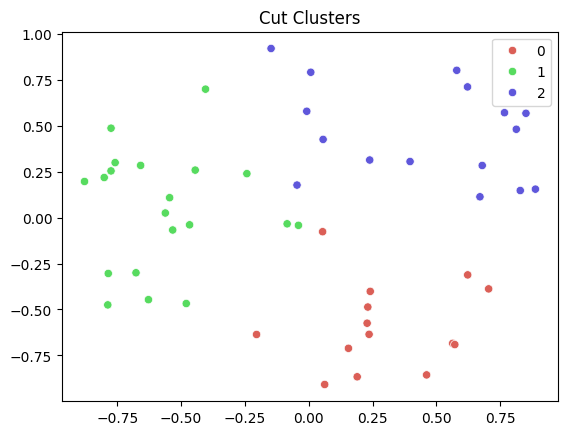

In [27]:
#Use PCA to project clusters into 2-space
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["cut"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["cut"]),
    legend="full",
    hue=models["cut"].labels_
).set(title="Cut Clusters")

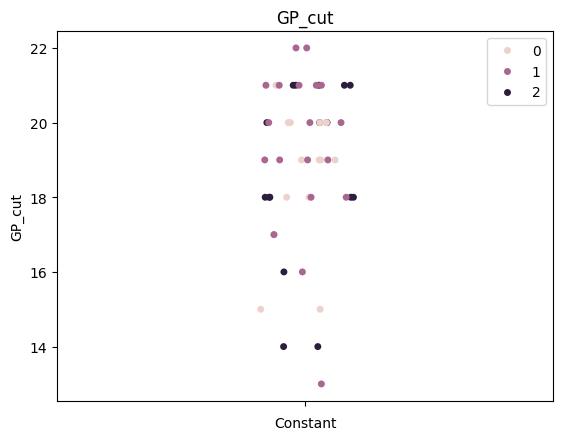

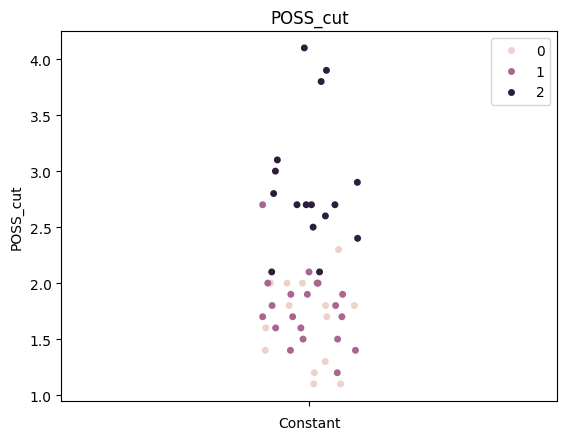

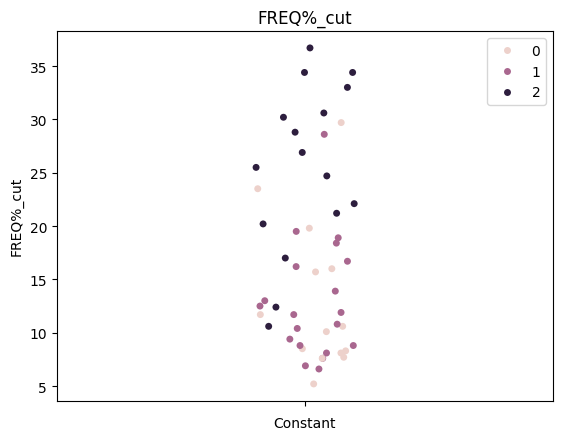

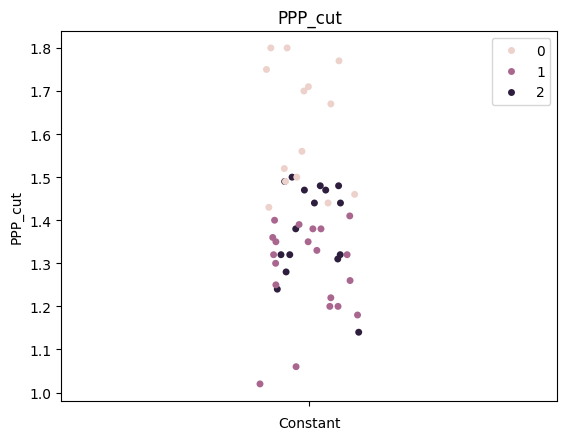

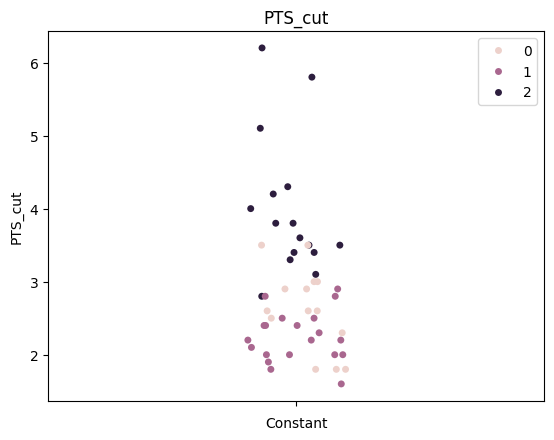

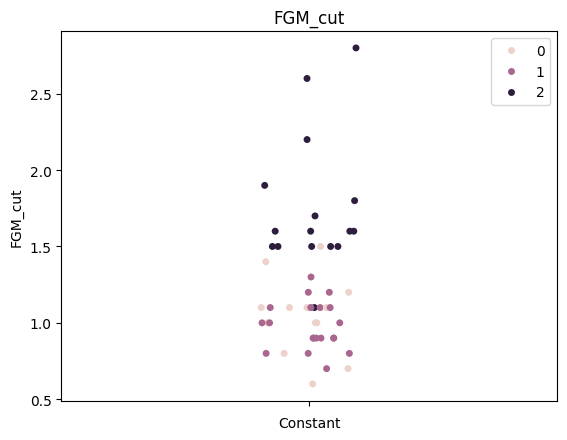

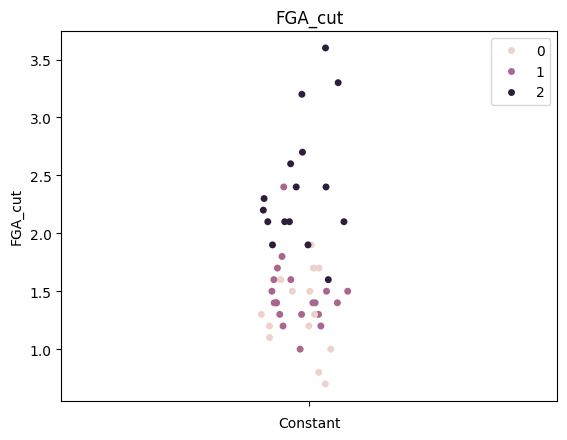

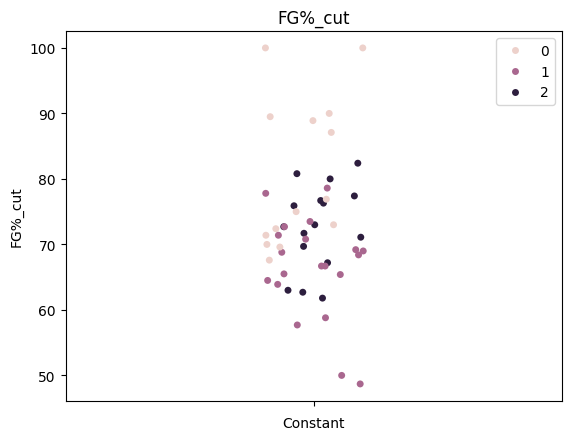

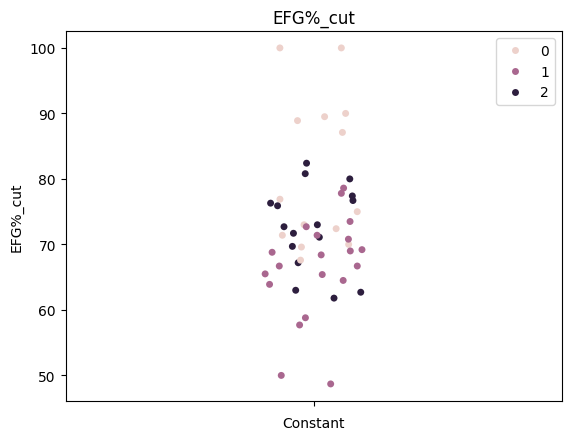

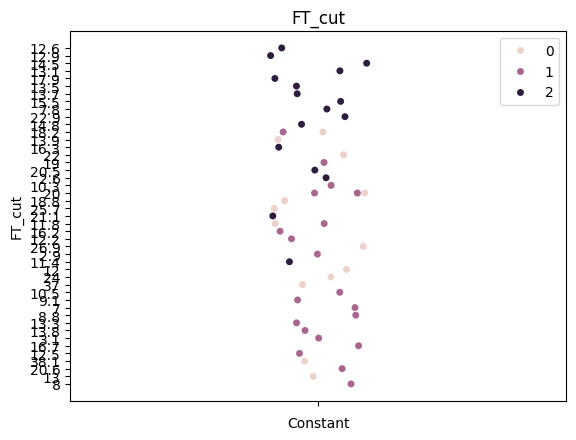

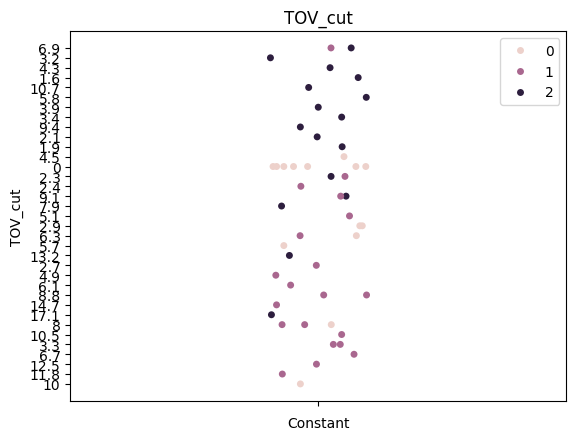

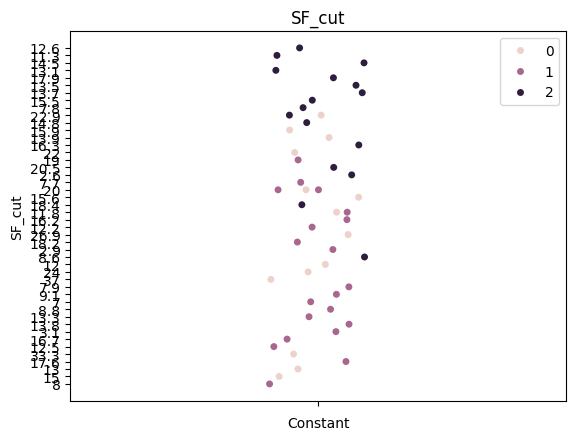

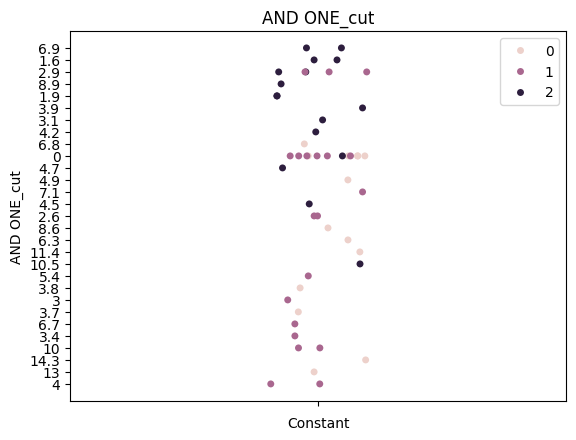

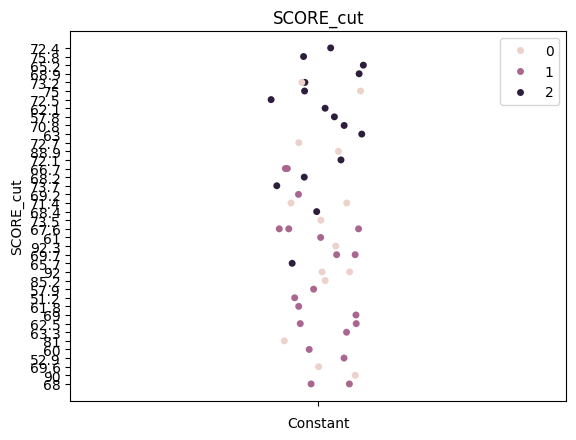

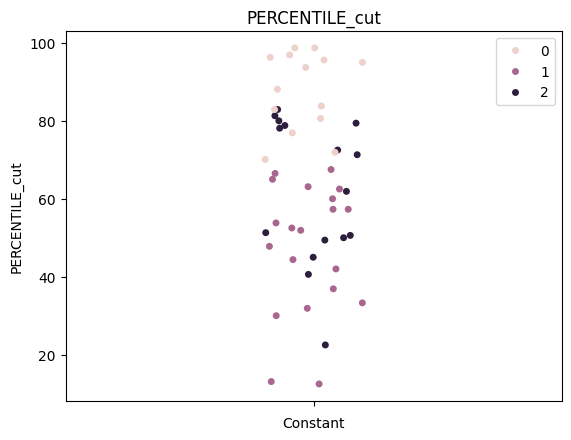

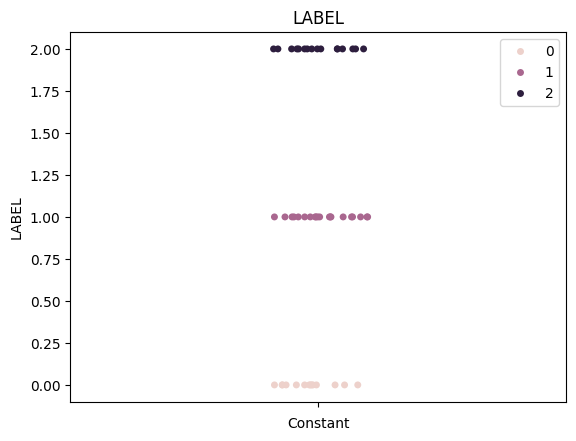

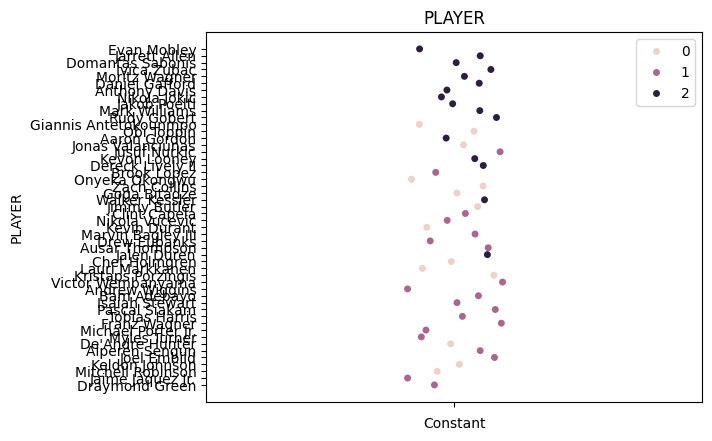

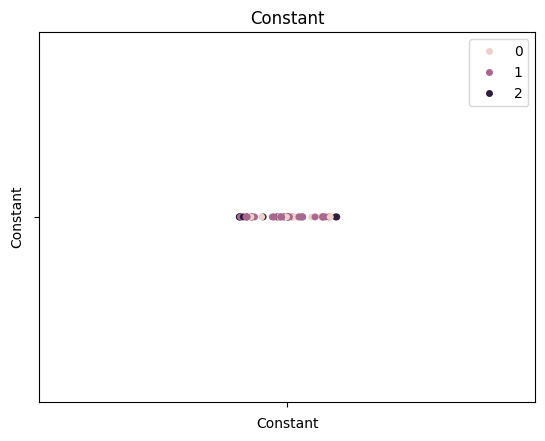

In [28]:
#Visualizing how cut clusters vary over different stats. Cut model not clustering well 
for key in raw_data["cut"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["cut"]['Constant'],y=raw_data_with_constant["cut"][key],hue=models["cut"].labels_,jitter=True).set(title=key)

In [29]:
#Get players in cut cluster 0
print(output["cut"][output["cut"]["LABEL"] == 0]["PLAYER"])

12    Giannis Antetokounmpo
13               Obi Toppin
15        Jonas Valanciunas
20           Onyeka Okongwu
21             Zach Collins
22             Goga Bitadze
24             Jimmy Butler
27             Kevin Durant
32            Chet Holmgren
33          Lauri Markkanen
34       Kristaps Porzingis
44          De'Andre Hunter
47           Keldon Johnson
48        Mitchell Robinson
Name: PLAYER, dtype: object


In [30]:
#Cut cluster 1
print(output["cut"][output["cut"]["LABEL"] == 1]["PLAYER"])

16          Jusuf Nurkic
19           Brook Lopez
25          Clint Capela
26        Nikola Vucevic
28     Marvin Bagley III
29          Drew Eubanks
30        Ausar Thompson
35     Victor Wembanyama
36        Andrew Wiggins
37           Bam Adebayo
38        Isaiah Stewart
39         Pascal Siakam
40         Tobias Harris
41          Franz Wagner
42    Michael Porter Jr.
43          Myles Turner
45        Alperen Sengun
46           Joel Embiid
49      Jaime Jaquez Jr.
50        Draymond Green
Name: PLAYER, dtype: object


In [31]:
#Get cluster 2
print(output["cut"][output["cut"]["LABEL"] == 2]["PLAYER"])

1          Evan Mobley
2        Jarrett Allen
3     Domantas Sabonis
4          Ivica Zubac
5        Moritz Wagner
6       Daniel Gafford
7        Anthony Davis
8         Nikola Jokic
9         Jakob Poeltl
10       Mark Williams
11         Rudy Gobert
14        Aaron Gordon
17        Kevon Looney
18    Dereck Lively II
23      Walker Kessler
31         Jalen Duren
Name: PLAYER, dtype: object


In [32]:
"""
Next, off screen
"""

'\nNext, off screen\n'

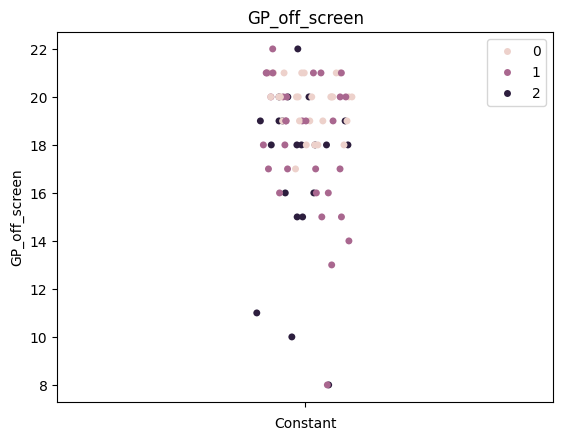

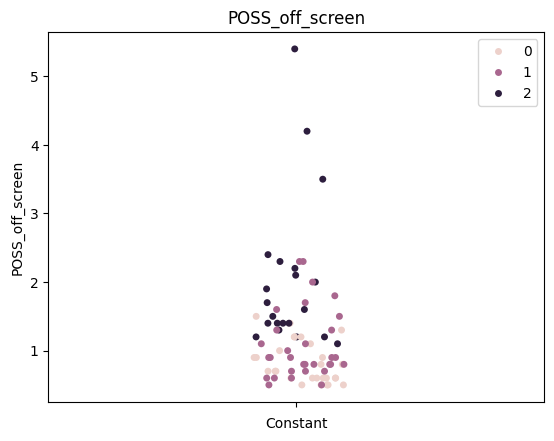

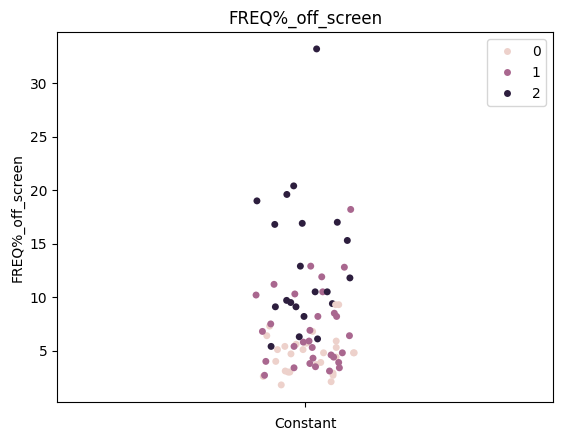

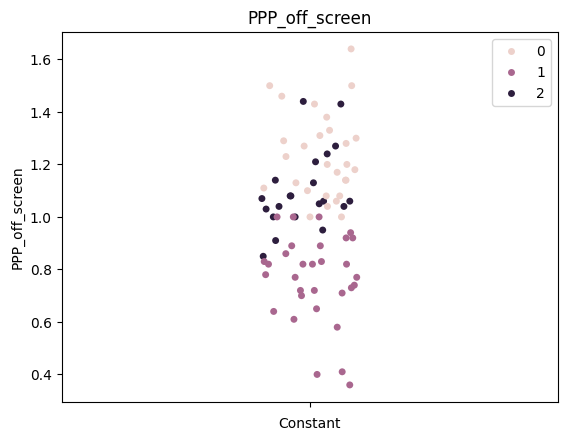

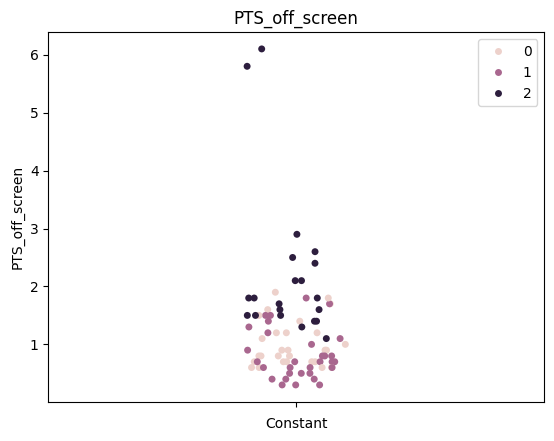

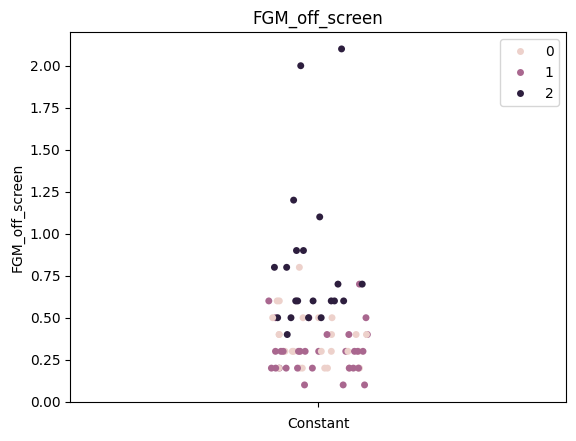

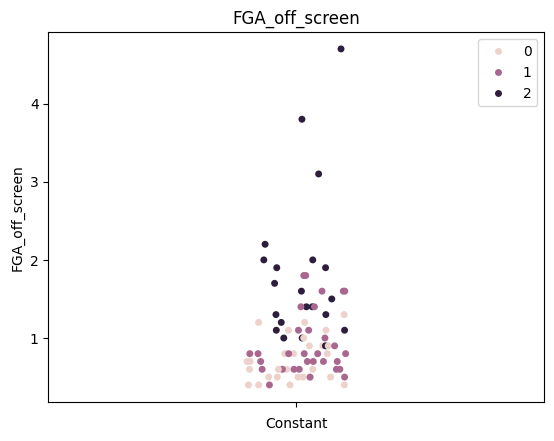

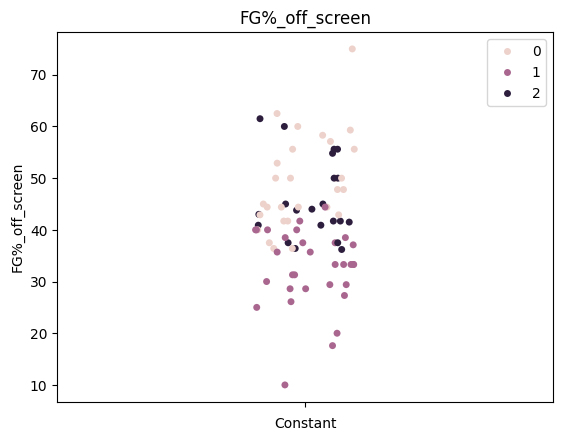

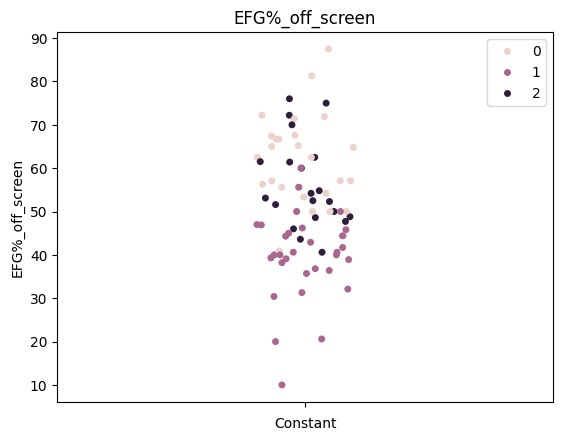

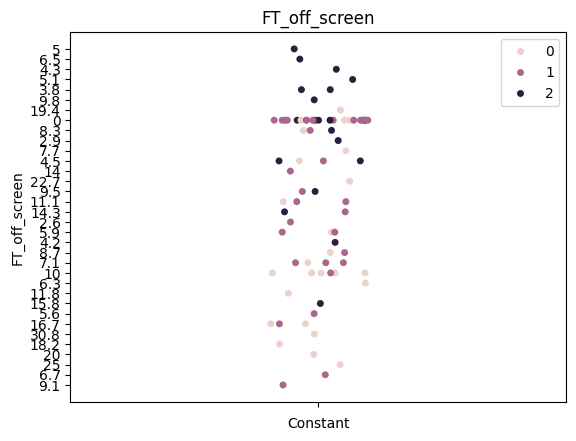

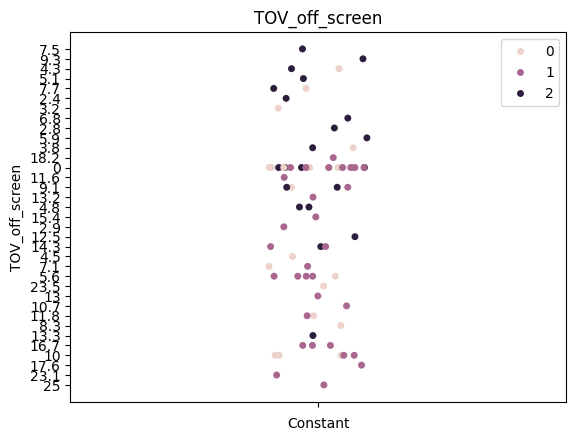

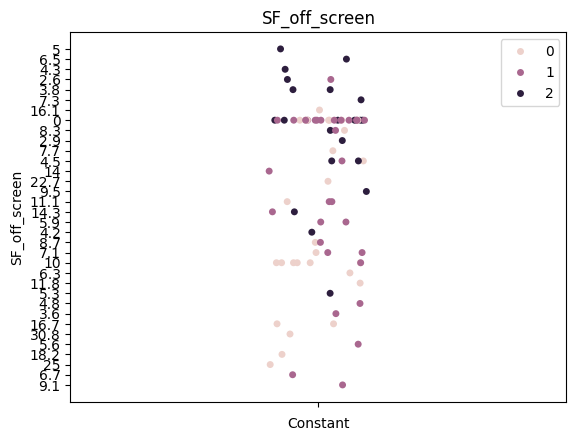

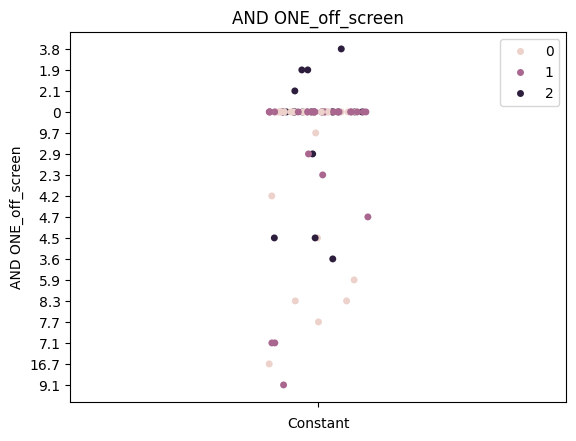

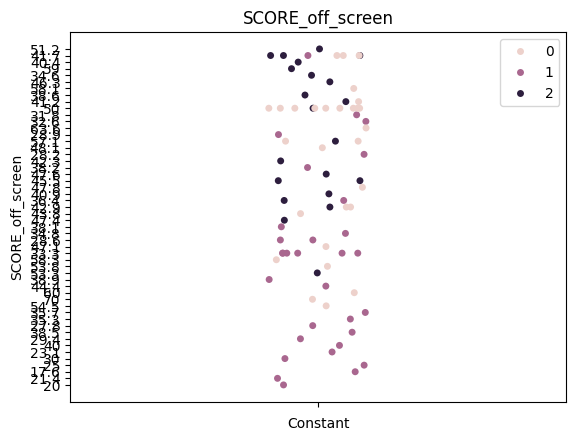

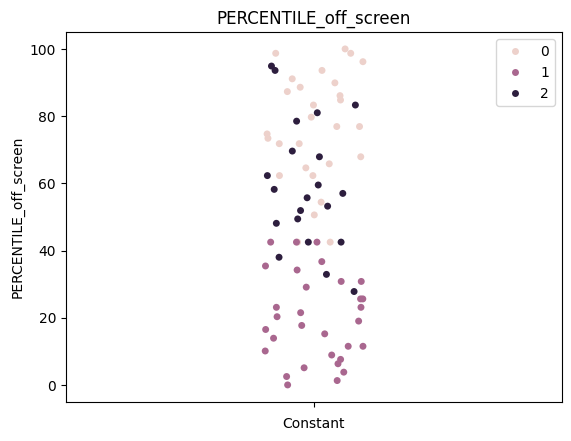

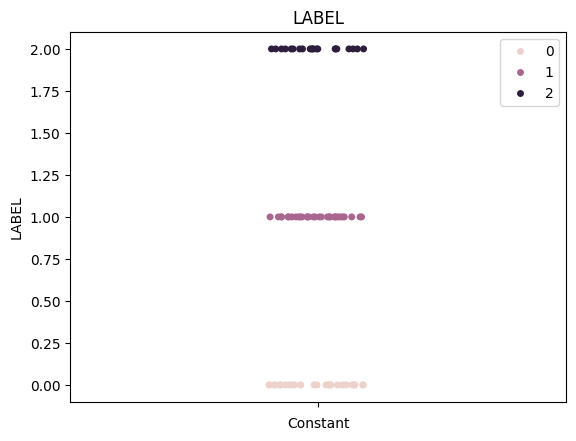

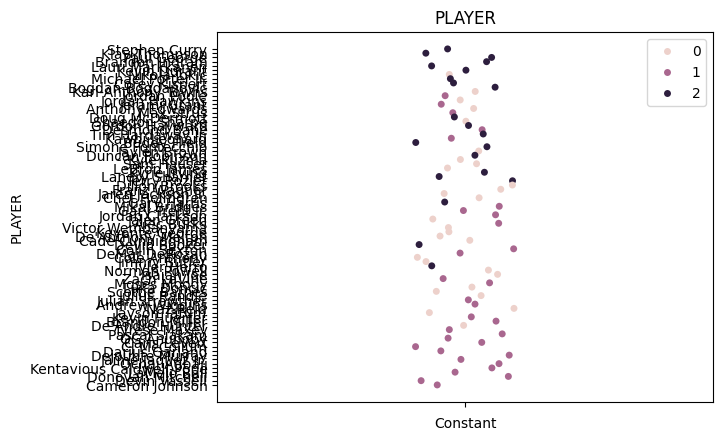

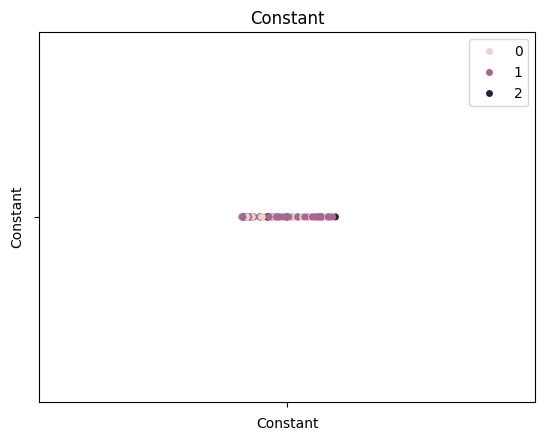

In [33]:
#Clustering doesn't seem to be dominated by a few variables here either. 
for key in raw_data["off_screen"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["off_screen"]['Constant'],y=raw_data_with_constant["off_screen"][key],hue=models["off_screen"].labels_,jitter=True).set(title=key)

In [34]:
#Get players in cut cluster 0
print(output["off_screen"][output["off_screen"]["LABEL"] == 0]["PLAYER"])

7           Nikola Jokic
11    Karl-Anthony Towns
13        Jordan Hawkins
15       Anthony Edwards
18        Shaedon Sharpe
25          Jaylen Brown
27            Kyle Kuzma
28            Sam Hauser
29          LeBron James
33         Dillon Brooks
34          Franz Wagner
35     Jaren Jackson Jr.
36         Chet Holmgren
41           Jalen Green
43     Victor Wembanyama
44        Keyonte George
45     De'Anthony Melton
46       Cade Cunningham
50          Cole Anthony
51          Jimmy Butler
53         Norman Powell
54            Isaiah Joe
57           Luka Doncic
58        Scottie Barnes
59         Julius Randle
62              Naz Reid
63          Jayson Tatum
66       De'Andre Hunter
Name: PLAYER, dtype: object


In [35]:
#Get players in cut cluster 1
print(output["off_screen"][output["off_screen"]["LABEL"] == 1]["PLAYER"])

12                Jordan Poole
14                Jerami Grant
16                   Max Strus
20                Desmond Bane
22               Kawhi Leonard
38               Mikal Bridges
39              Gary Trent Jr.
40             Jordan Clarkson
42                  Alec Burks
48               Collin Sexton
49               DeMar DeRozan
55                 Zach LaVine
56                 Moses Moody
60            Julian Strawther
61              Andrew Wiggins
64               Kevin Huerter
65              Brandon Miller
67                Tyrese Maxey
68               Pascal Siakam
69                  OG Anunoby
70                Caris LeVert
71                 CJ McCollum
72              Darius Garland
73             Dejounte Murray
74            Jaime Jaquez Jr.
75                Ochai Agbaji
76    Kentavious Caldwell-Pope
77                 LaMelo Ball
78            Donovan Mitchell
79               Devin Vassell
80             Cameron Johnson
Name: PLAYER, dtype: object


In [36]:
#Get players in cut cluster 2
print(output["off_screen"][output["off_screen"]["LABEL"] == 2]["PLAYER"])

1          Stephen Curry
2          Klay Thompson
3            Paul George
4         Brandon Ingram
5        Lauri Markkanen
6           Kevin Durant
8     Michael Porter Jr.
9          Corey Kispert
10     Bogdan Bogdanovic
17        Doug McDermott
19        Gordon Hayward
21      Tim Hardaway Jr.
23           Buddy Hield
24     Simone Fontecchio
26       Duncan Robinson
30          Kyrie Irving
31         Landry Shamet
32          Terry Rozier
37           Gary Harris
47          Devin Booker
52           Tyler Herro
Name: PLAYER, dtype: object


In [37]:
"""
Pick and roll ball handler
"""

'\nPick and roll ball handler\n'

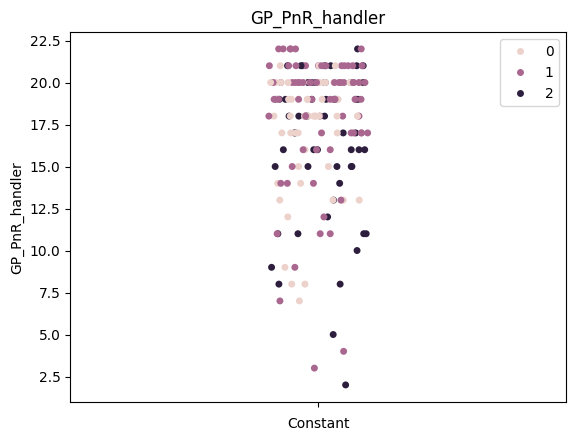

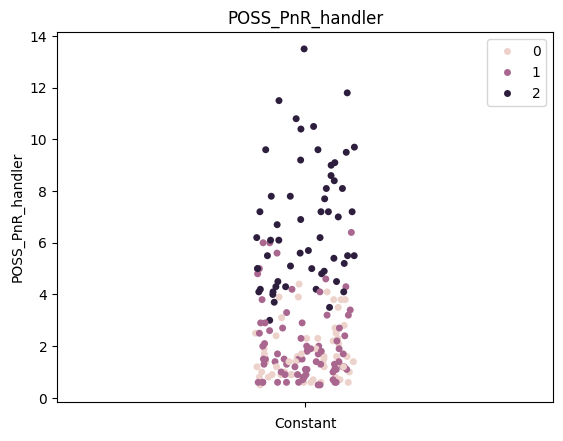

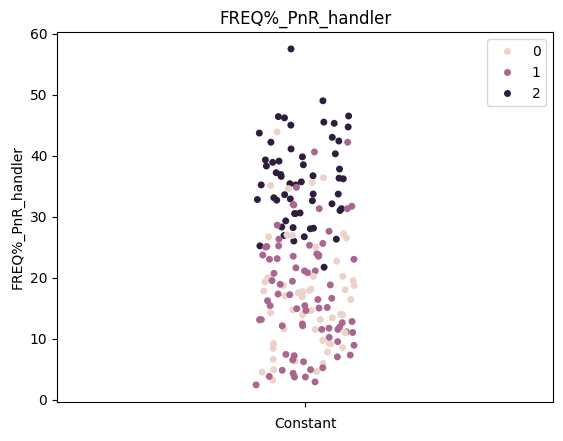

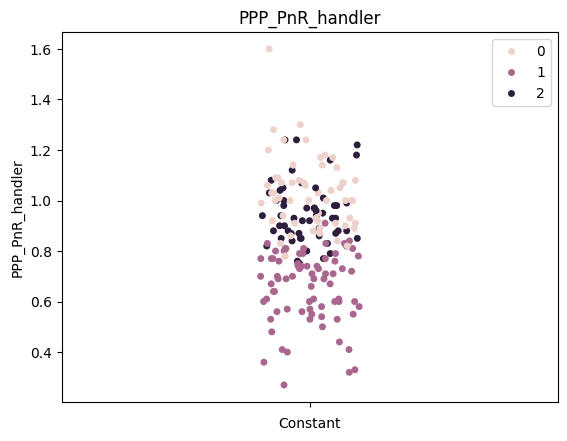

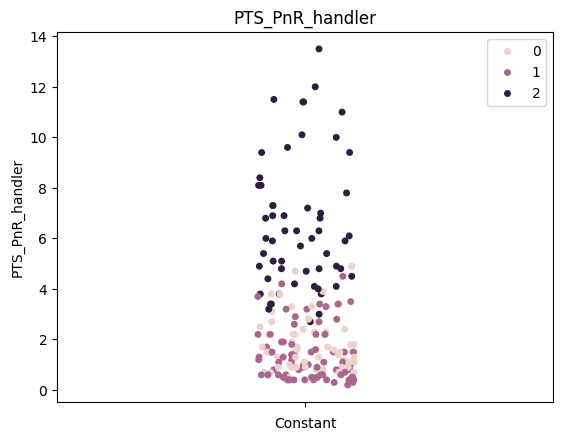

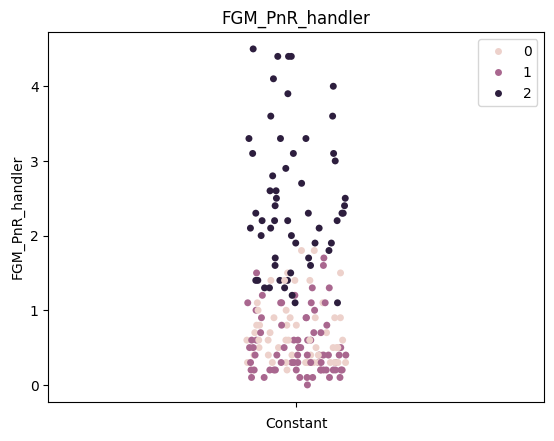

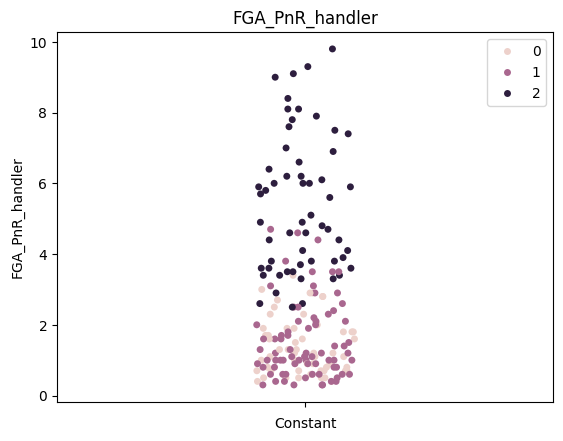

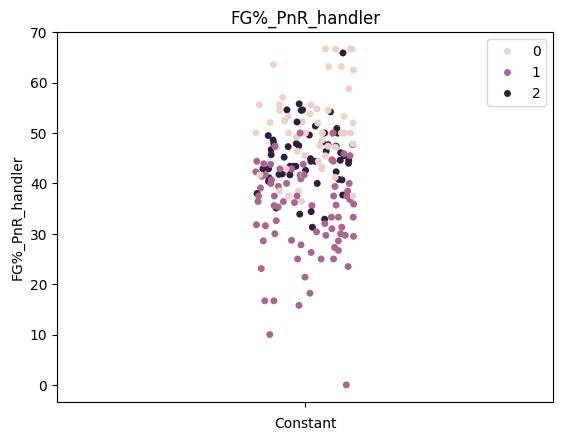

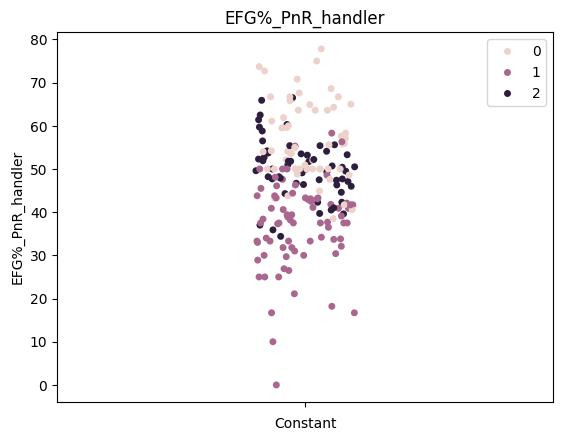

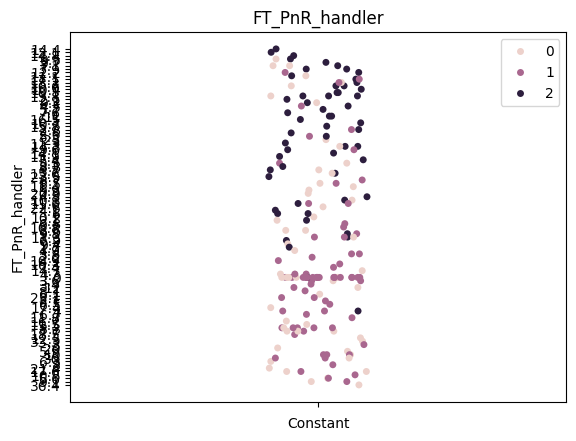

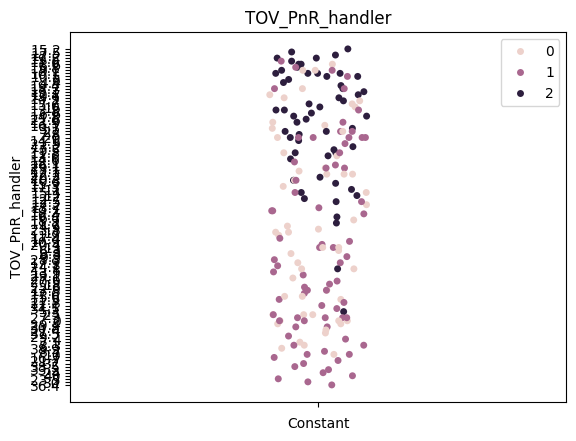

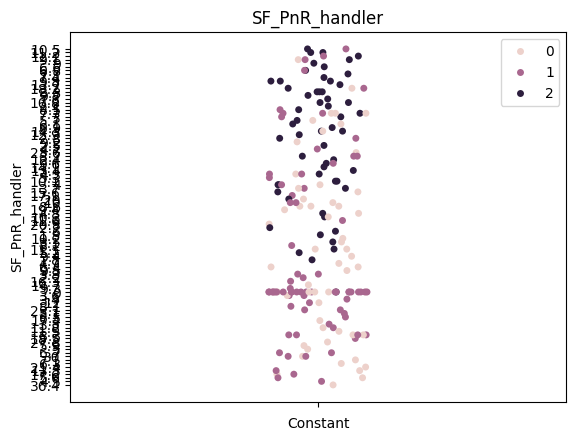

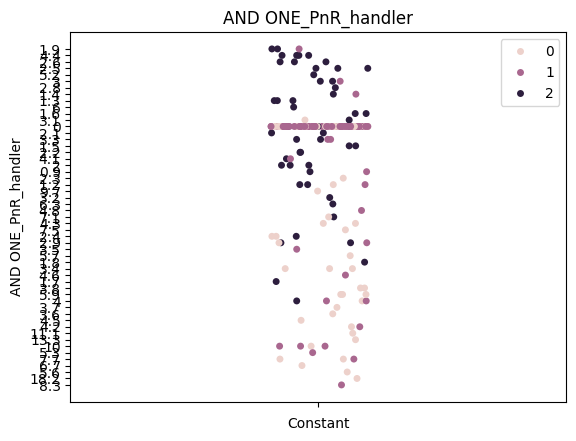

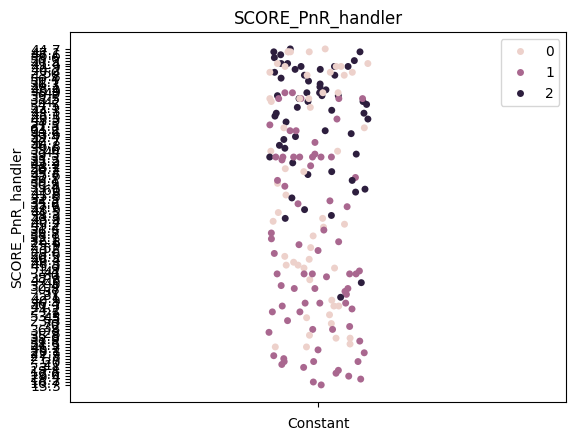

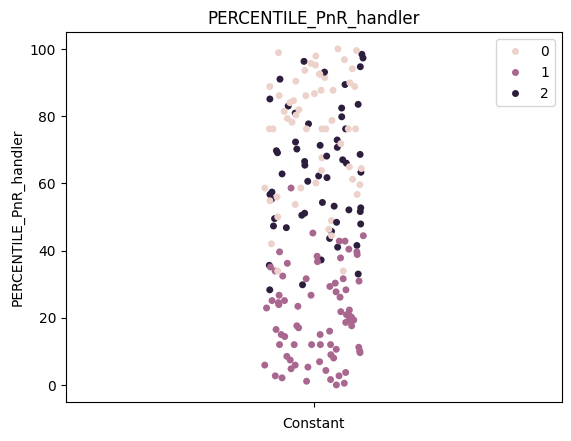

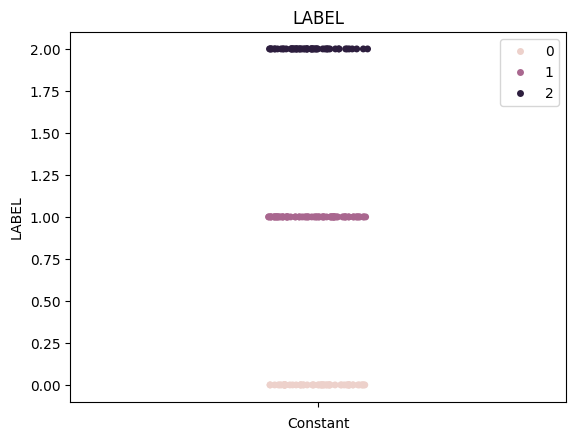

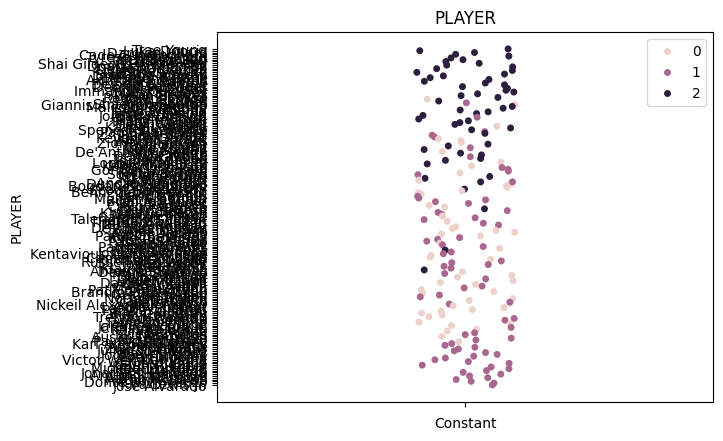

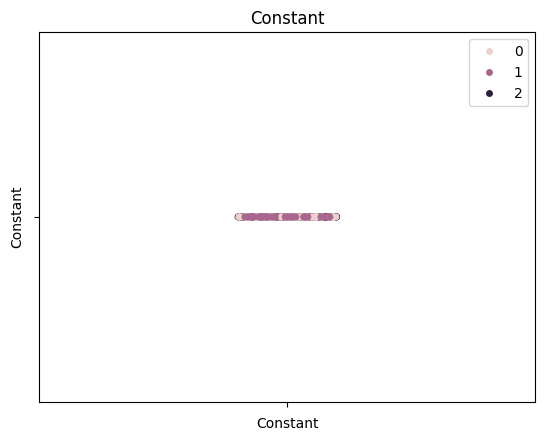

In [38]:
for key in raw_data["PnR_handler"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["PnR_handler"]['Constant'],y=raw_data_with_constant["PnR_handler"][key],hue=models["PnR_handler"].labels_,jitter=True).set(title=key)

In [39]:
#Cluster 0
print(output["PnR_handler"][output["PnR_handler"]["LABEL"] == 0]["PLAYER"])

29               Paul George
32     Giannis Antetokounmpo
44             Kawhi Leonard
51              Kevin Durant
52              LeBron James
53           Zion Williamson
58         De'Anthony Melton
64          Lonnie Walker IV
66            Keldon Johnson
70            Scottie Barnes
74                RJ Barrett
76           Duncan Robinson
77         Bogdan Bogdanovic
78                Kyle Lowry
80        Bennedict Mathurin
81              Jerami Grant
82            Gary Trent Jr.
88          Craig Porter Jr.
89               Bruce Brown
94             Cameron Payne
97          Tim Hardaway Jr.
100          De'Andre Hunter
101             Bones Hyland
102              Alex Caruso
103            Dyson Daniels
104            Aaron Holiday
105         Patrick Beverley
109               Jaden Ivey
112            Dillon Brooks
116            Herbert Jones
117          Cameron Johnson
118           Jordan Goodwin
125         Dennis Smith Jr.
127             Shake Milton
128           

In [40]:
#Cluster 1
print(output["PnR_handler"][output["PnR_handler"]["LABEL"] == 1]["PLAYER"])

31       Shaedon Sharpe
39         Jayson Tatum
47       Paolo Banchero
49           Coby White
50       Keyonte George
             ...       
185       Aaron Nesmith
186       Anthony Davis
187    Donte DiVincenzo
188      Kira Lewis Jr.
189       Jose Alvarado
Name: PLAYER, Length: 75, dtype: object


In [41]:
#Cluster 2
print(output["PnR_handler"][output["PnR_handler"]["LABEL"] == 2]["PLAYER"])

1                   Trae Young
2                  Luka Doncic
3               Damian Lillard
4              Cade Cunningham
5            Tyrese Haliburton
6                Jalen Brunson
7                  LaMelo Ball
8                 Tyrese Maxey
9      Shai Gilgeous-Alexander
10            Donovan Mitchell
11                De'Aaron Fox
12               DeMar DeRozan
13               Stephen Curry
14              Darius Garland
15              Brandon Ingram
16            D'Angelo Russell
17                Desmond Bane
18             Anthony Edwards
19                 Zach LaVine
20             Dejounte Murray
21               Fred VanVleet
22             Dennis Schroder
23                 Jalen Green
24           Immanuel Quickley
25               Mikal Bridges
26               Austin Reaves
27                Devin Booker
28              Reggie Jackson
30                  Tyus Jones
33             Malcolm Brogdon
34                Cole Anthony
35              Jalen Williams
36      

In [42]:
"""
PnR roller
"""

'\nPnR roller\n'

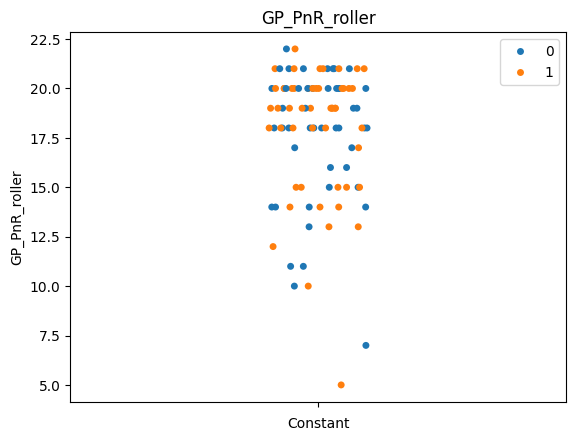

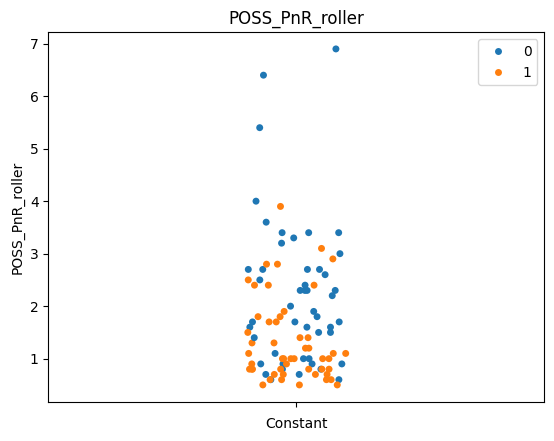

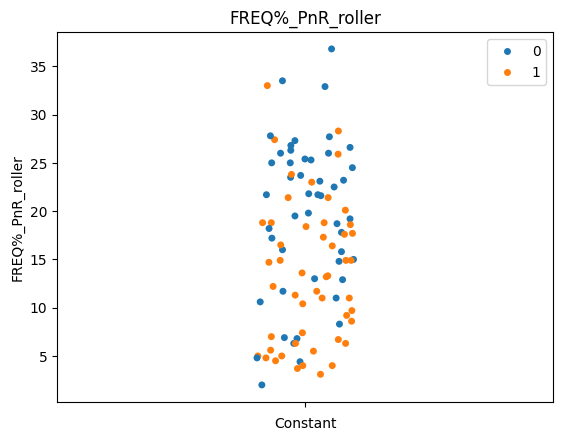

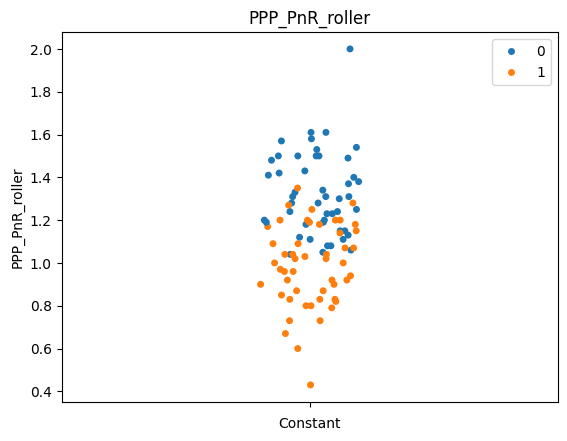

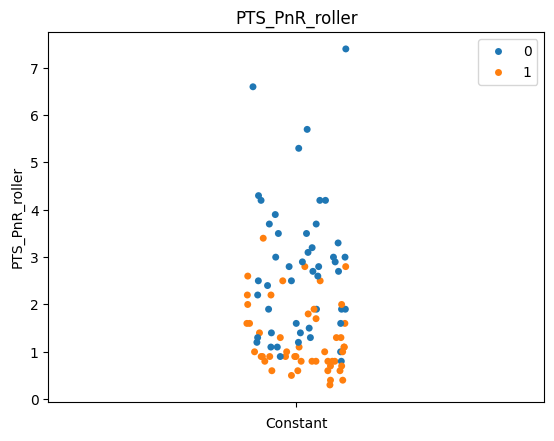

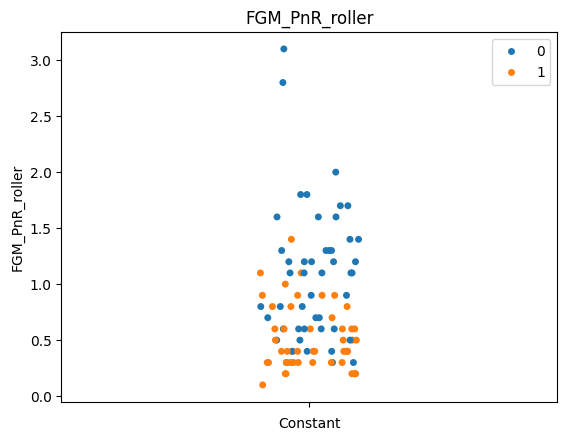

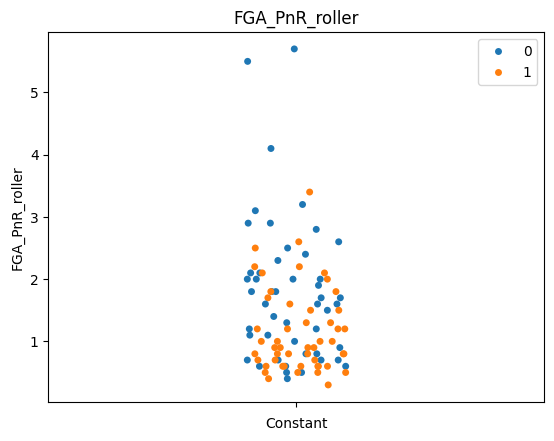

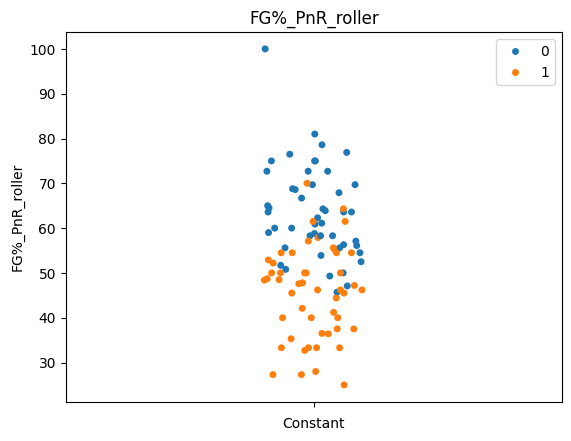

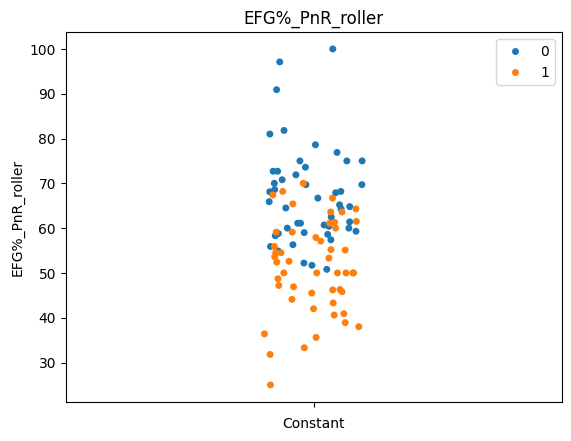

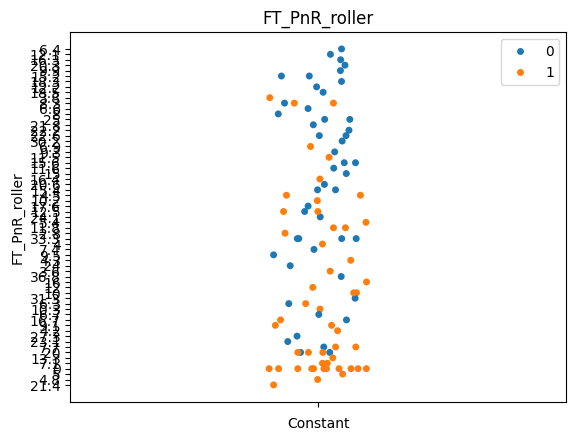

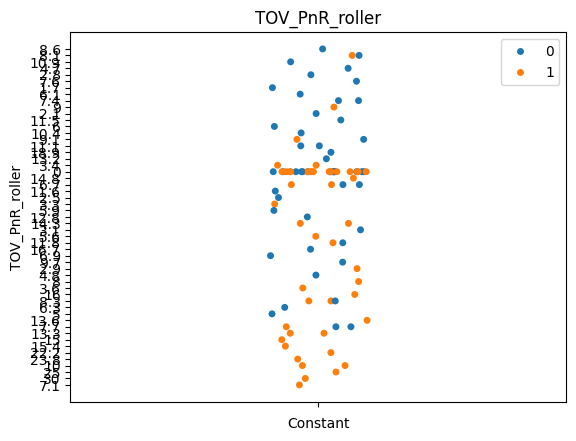

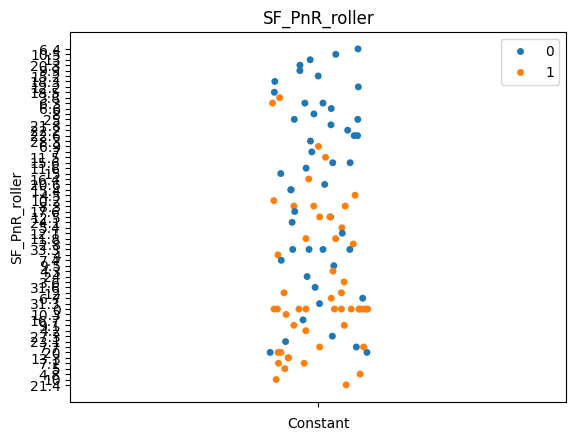

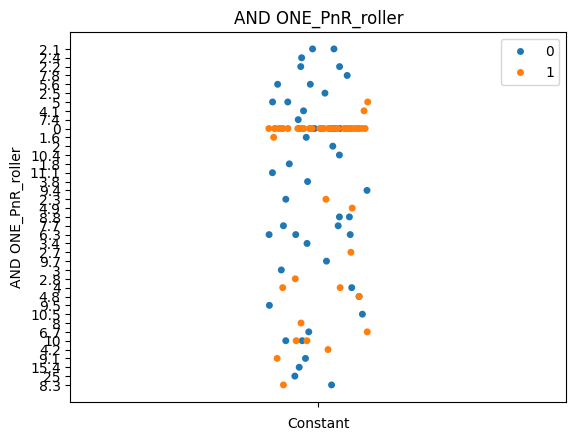

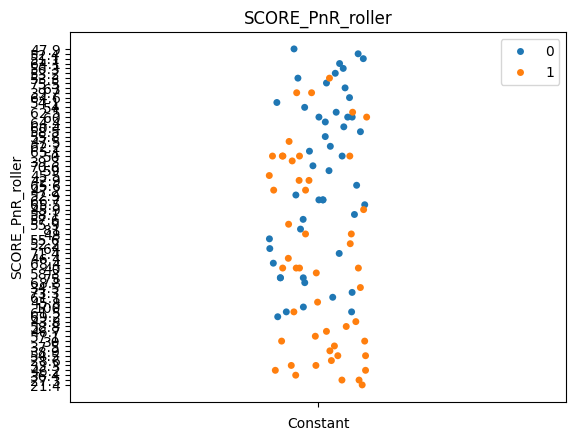

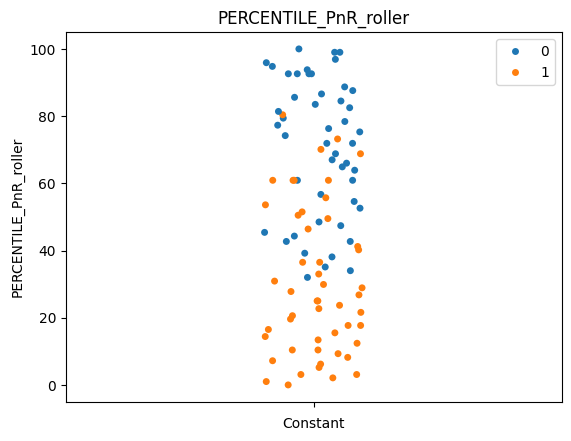

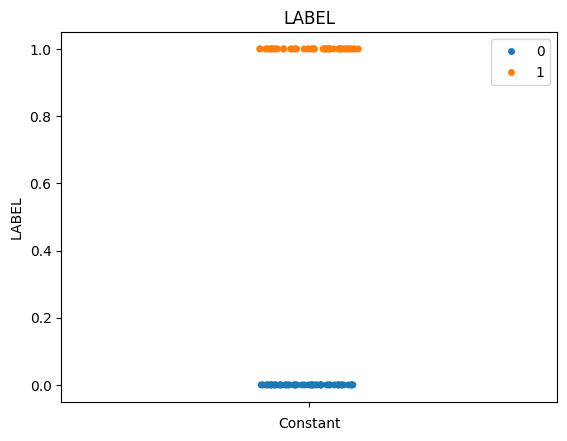

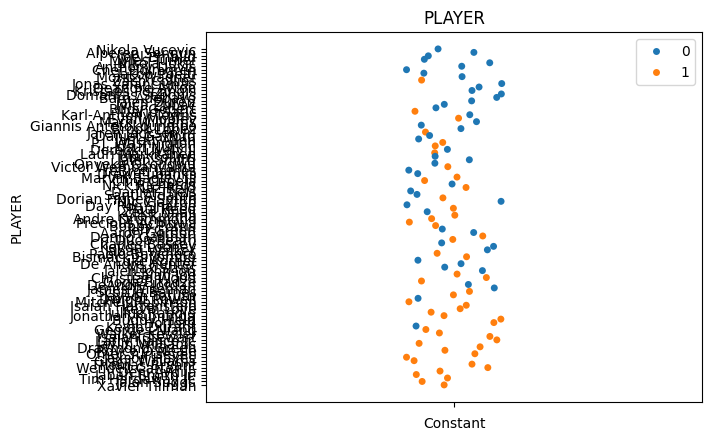

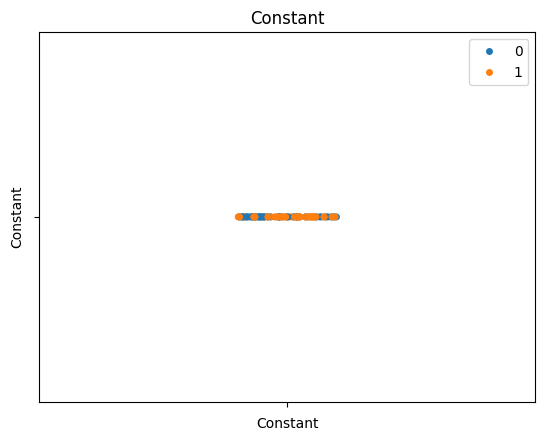

In [43]:
for key in raw_data["PnR_roller"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["PnR_roller"]['Constant'],y=raw_data_with_constant["PnR_roller"][key],hue=models["PnR_roller"].labels_,jitter=True).set(title=key)

In [44]:
#Cluster 0
print(output["PnR_roller"][output["PnR_roller"]["LABEL"] == 0]["PLAYER"])

1            Nikola Vucevic
2            Alperen Sengun
3               Joel Embiid
4              Myles Turner
5              Nikola Jokic
6             Anthony Davis
7             Chet Holmgren
8              Jakob Poeltl
9             Moritz Wagner
11        Jonas Valanciunas
12            Deandre Ayton
13       Kristaps Porzingis
14         Domantas Sabonis
15              Bam Adebayo
16              Jalen Duren
17              Ivica Zubac
18              Rudy Gobert
20       Karl-Anthony Towns
22            Mark Williams
23    Giannis Antetokounmpo
24              Brook Lopez
26           Daniel Gafford
27            Jarrett Allen
30         Dereck Lively II
32             John Collins
33              Jalen Smith
34           Onyeka Okongwu
36             LeBron James
37             Drew Eubanks
40            Nick Richards
42             Daniel Theis
43             Santi Aldama
45              Nic Claxton
46           Day'Ron Sharpe
48               Zeke Nnaji
53               Jef

In [45]:
#Cluster 1
print(output["PnR_roller"][output["PnR_roller"]["LABEL"] == 1]["PLAYER"])

10           Zach Collins
19            Dario Saric
21            Evan Mobley
25      Jaren Jackson Jr.
28        P.J. Washington
29           Jusuf Nurkic
31        Lauri Markkanen
35      Victor Wembanyama
38      Marvin Bagley III
39           Clint Capela
41               Naz Reid
44    Dorian Finney-Smith
47              Paul Reed
49             Kyle Kuzma
50         Andre Drummond
51       Precious Achiuwa
52           Bobby Portis
55       Danilo Gallinari
56             Duop Reath
60         Paolo Banchero
61        Bismack Biyombo
66             Isaiah Joe
67         Christian Wood
68           Goga Bitadze
71         Scottie Barnes
72           Jayson Tatum
74      Mitchell Robinson
75     Isaiah Hartenstein
76             Kevin Love
77          Julius Randle
78       Jonathan Kuminga
79            Buddy Hield
80             Al Horford
82          Georges Niang
83         Walker Kessler
84         Isaiah Stewart
85        Larry Nance Jr.
86        Jaylin Williams
87         D

In [46]:
"""
Post up
"""

'\nPost up\n'

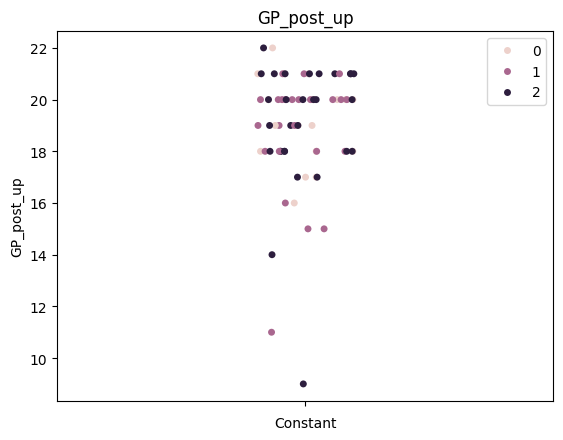

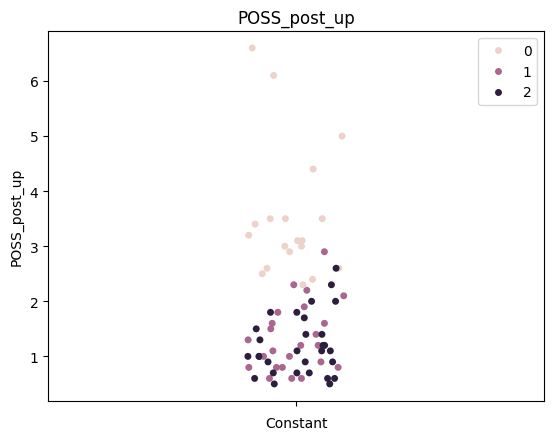

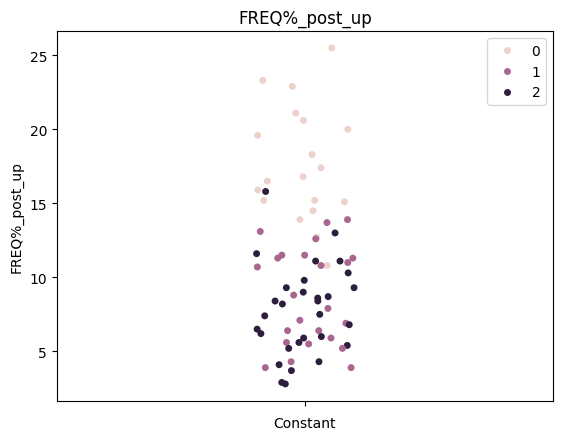

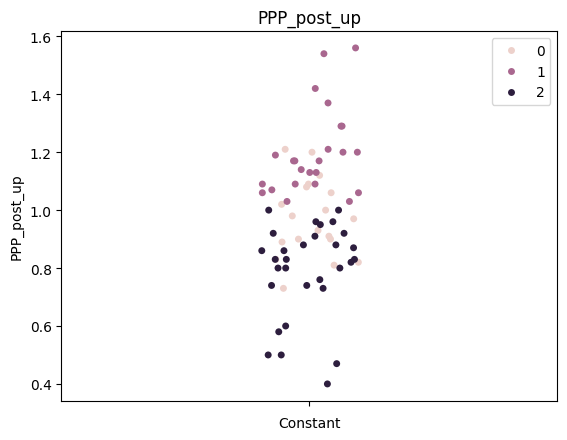

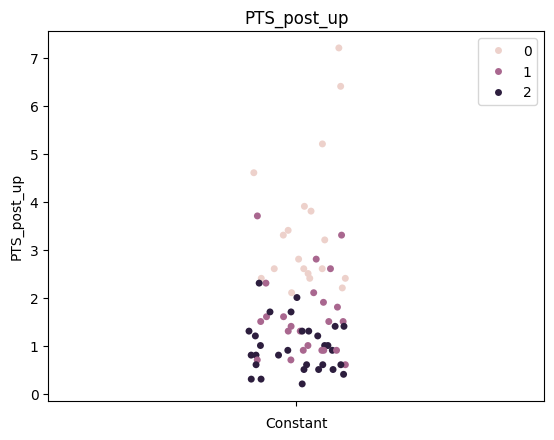

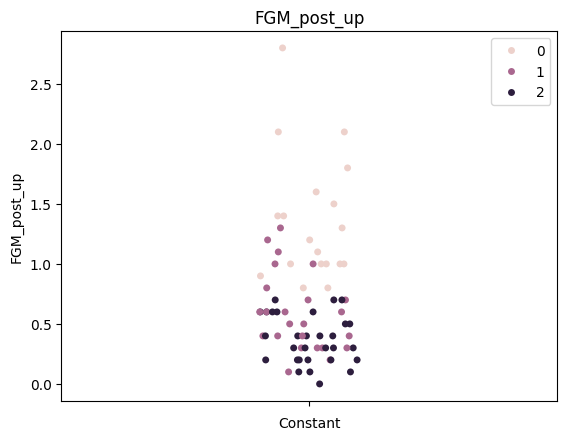

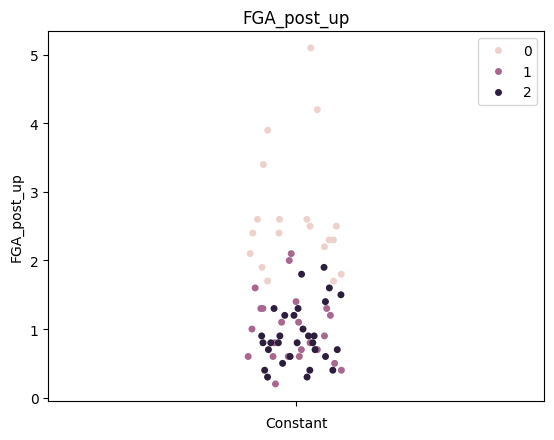

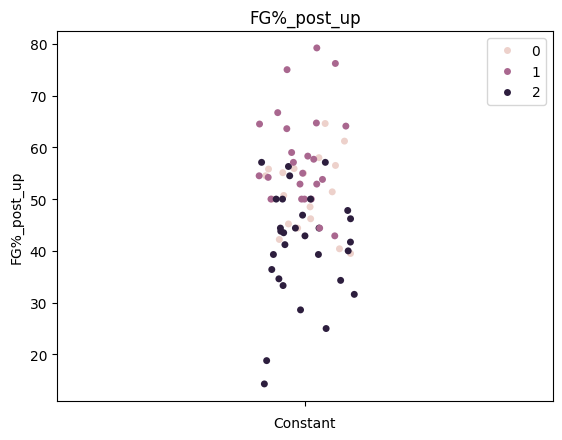

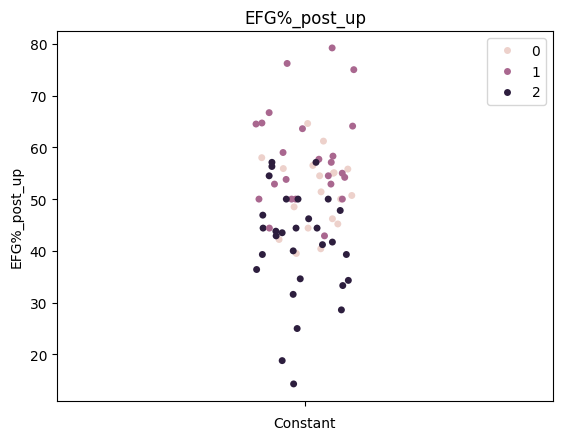

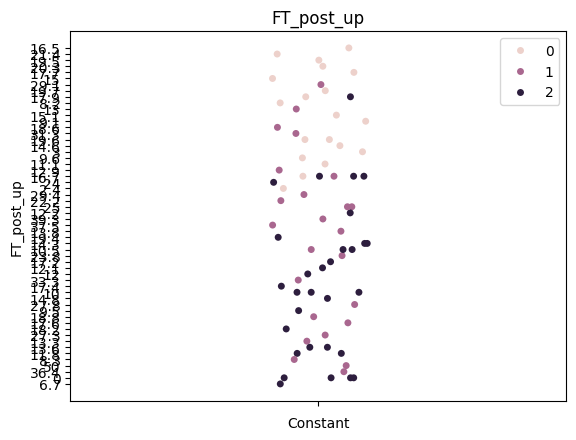

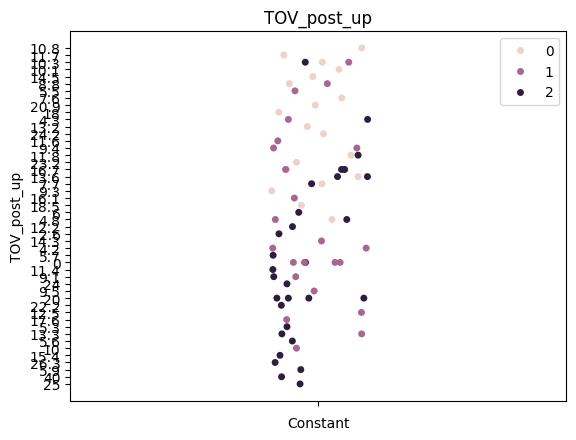

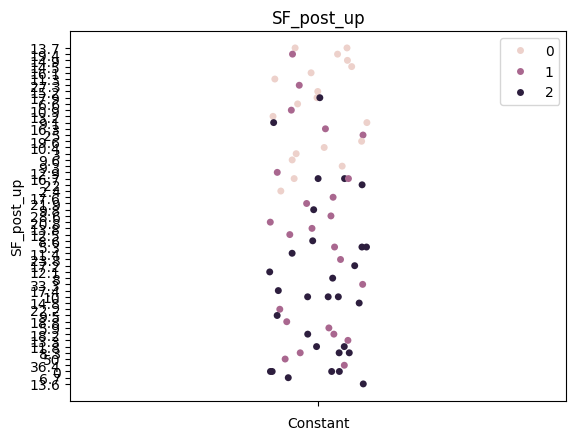

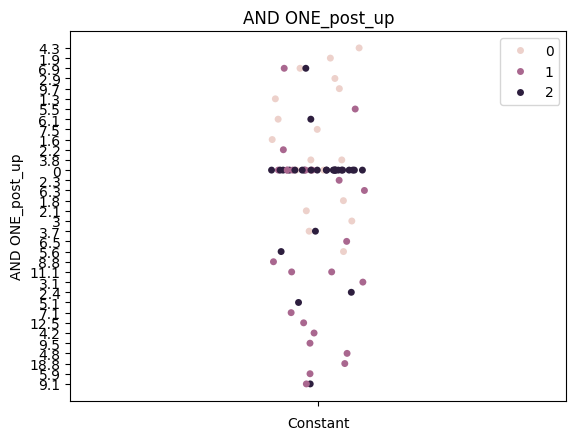

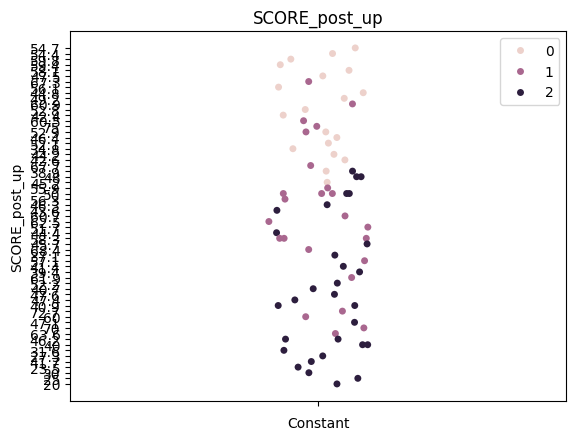

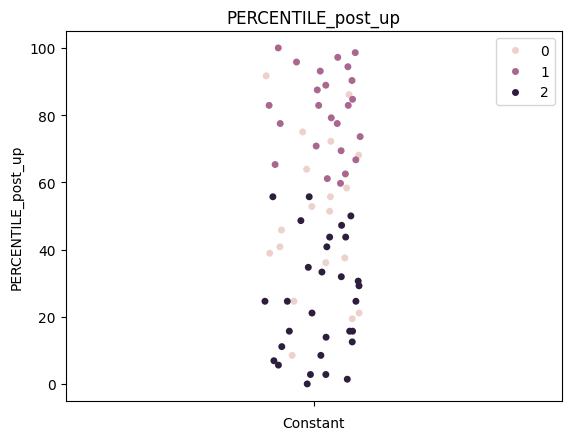

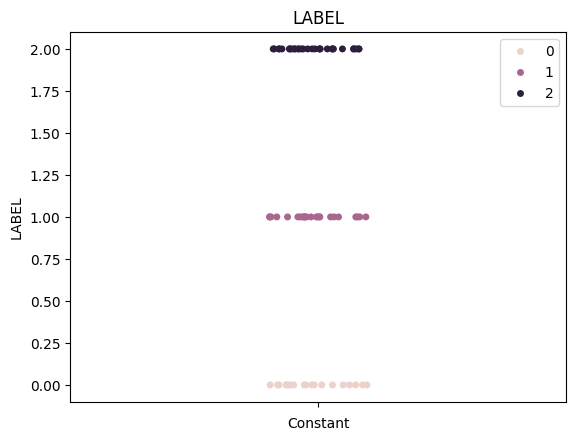

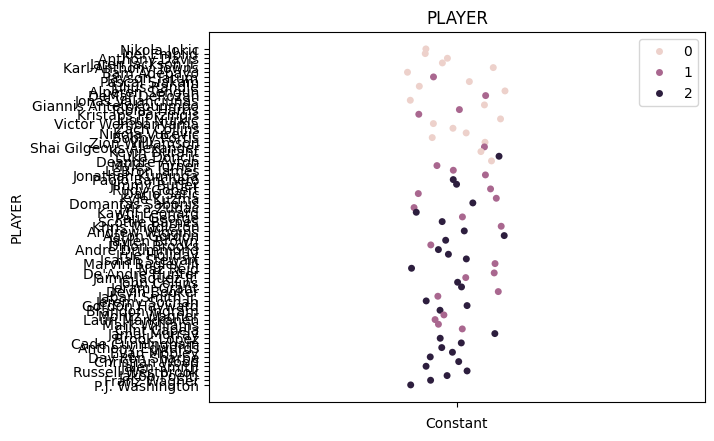

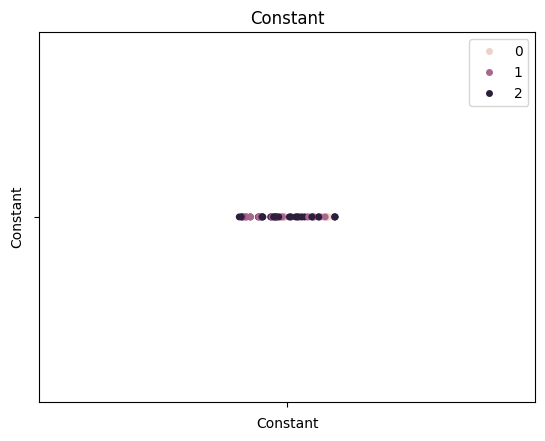

In [47]:
for key in raw_data["post_up"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["post_up"]['Constant'],y=raw_data_with_constant["post_up"][key],hue=models["post_up"].labels_,jitter=True).set(title=key)

In [48]:
#Cluster 0
print(output["post_up"][output["post_up"]["LABEL"] == 0]["PLAYER"])

1              Nikola Jokic
2               Joel Embiid
3             Anthony Davis
4         Jaren Jackson Jr.
5        Karl-Anthony Towns
6               Bam Adebayo
8             Pascal Siakam
9             Julius Randle
10           Alperen Sengun
12        Jonas Valanciunas
13    Giannis Antetokounmpo
16             Jusuf Nurkic
17        Victor Wembanyama
18             Zach Collins
19           Nikola Vucevic
20             Bobby Portis
21          Zion Williamson
23             Kevin Durant
25            Deandre Ayton
Name: PLAYER, dtype: object


In [49]:
#Lots of bigs in this category
print(output["post_up"][output["post_up"]["LABEL"] == 1]["PLAYER"])

7                Jayson Tatum
11              DeMar DeRozan
14              Tobias Harris
15         Kristaps Porzingis
22    Shai Gilgeous-Alexander
26               Myles Turner
27               LeBron James
28           Jonathan Kuminga
31                Rudy Gobert
32                Dario Saric
33                 Kyle Kuzma
35                Ivica Zubac
37                Paul George
39            Khris Middleton
43              Dillon Brooks
47          Marvin Bagley III
49            De'Andre Hunter
50           Jaime Jaquez Jr.
53               Devin Booker
54           Jabari Smith Jr.
58              Moritz Wagner
59            Lauri Markkanen
60              Mark Williams
61               Clint Capela
Name: PLAYER, dtype: object


In [50]:
print(output["post_up"][output["post_up"]["LABEL"] == 2]["PLAYER"])

24          Luka Doncic
29       Paolo Banchero
30         Jimmy Butler
34     Domantas Sabonis
36        Kawhi Leonard
38       Scottie Barnes
40       Andrew Wiggins
41         Aaron Gordon
42         Jaylen Brown
44       Andre Drummond
45         Jrue Holiday
46       Isaiah Stewart
48             Naz Reid
51         John Collins
52         Jerami Grant
55        Jeremy Sochan
56       Gordon Hayward
57       Brandon Ingram
62         Jamal Murray
63          Brook Lopez
64      Cade Cunningham
65      Anthony Edwards
66          Evan Mobley
67       Day'Ron Sharpe
68       Christian Wood
69          Jalen Smith
70    Russell Westbrook
71         Jakob Poeltl
72         Franz Wagner
73      P.J. Washington
Name: PLAYER, dtype: object


In [51]:
"""
Spot up
"""

'\nSpot up\n'

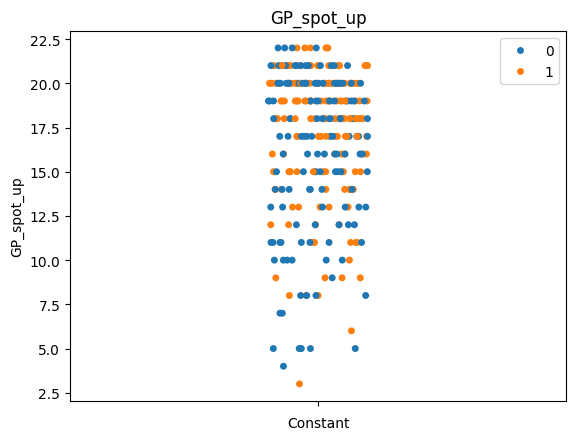

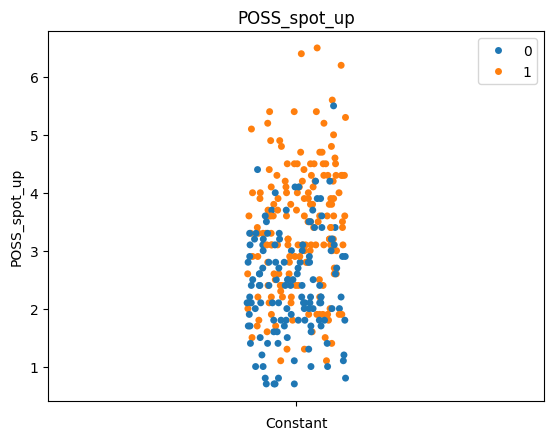

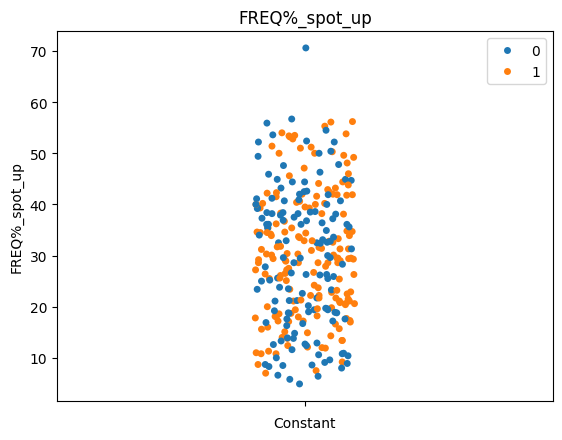

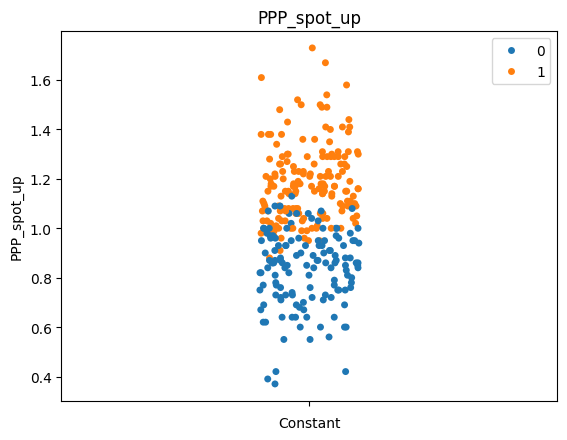

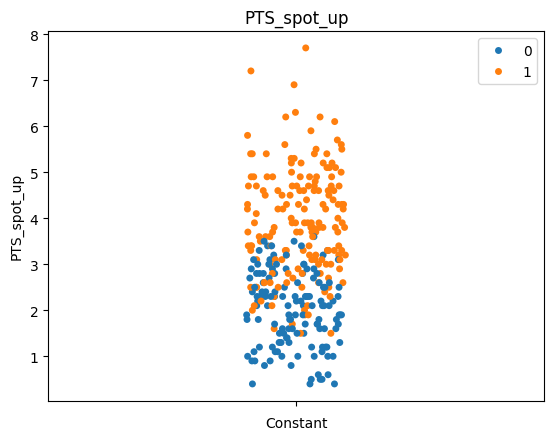

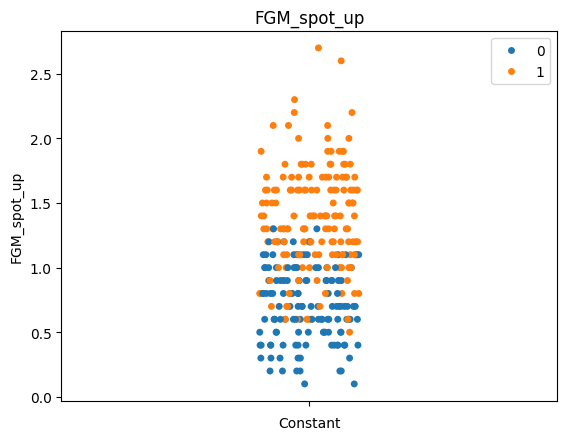

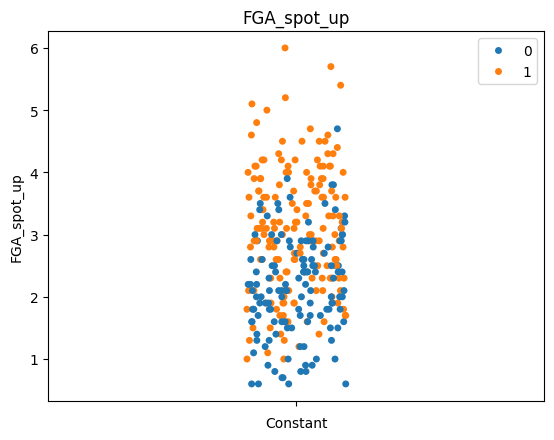

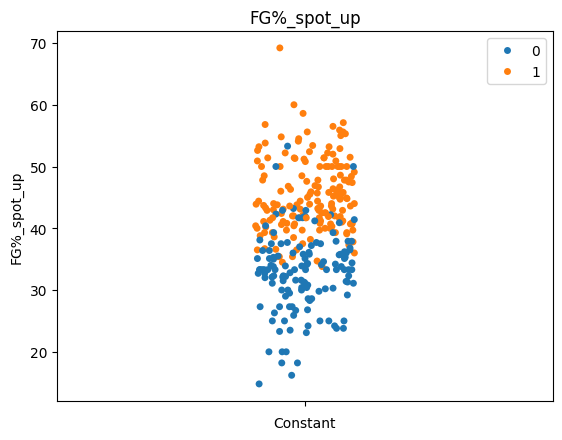

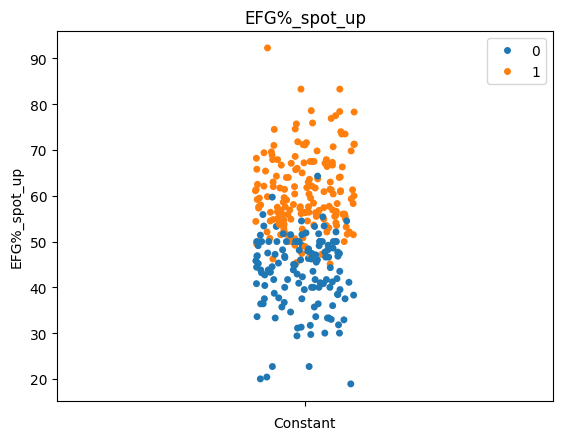

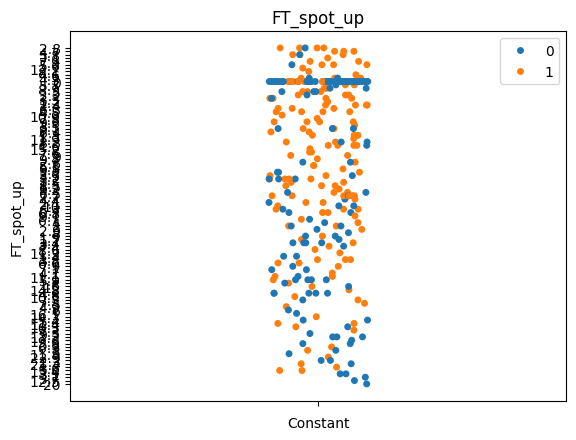

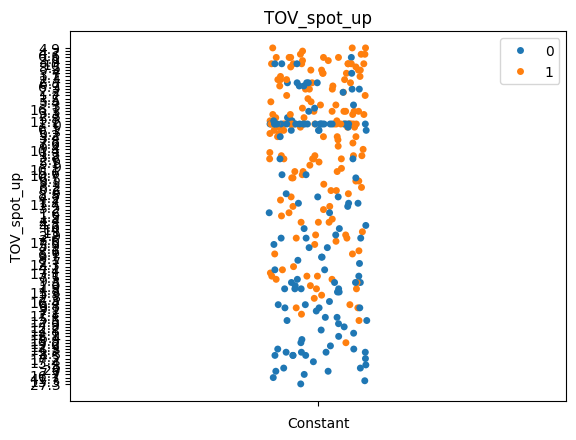

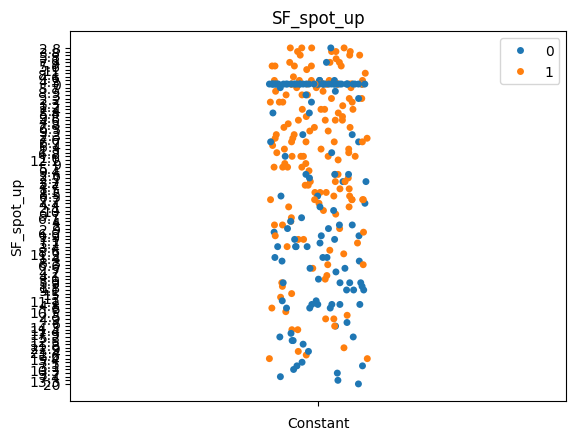

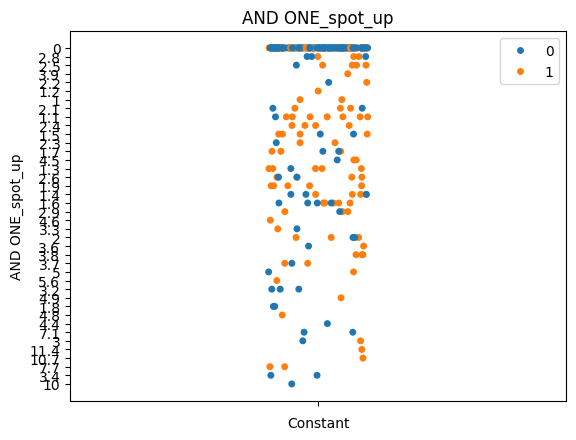

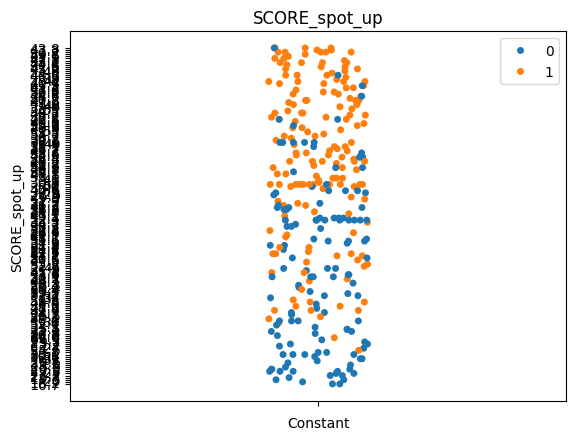

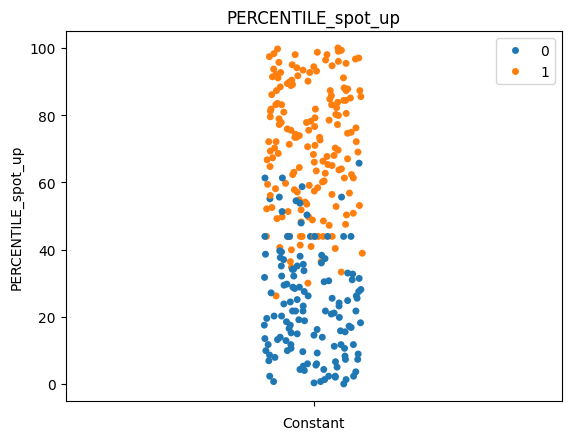

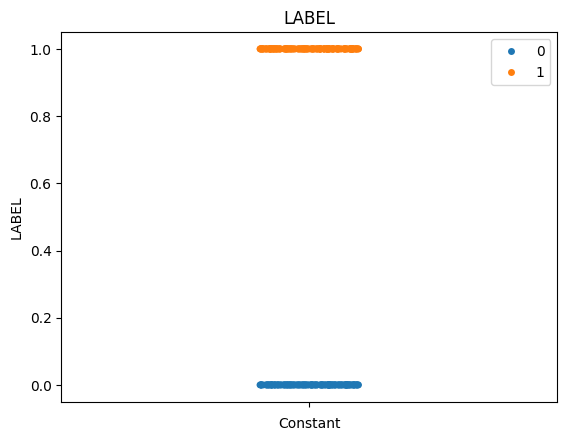

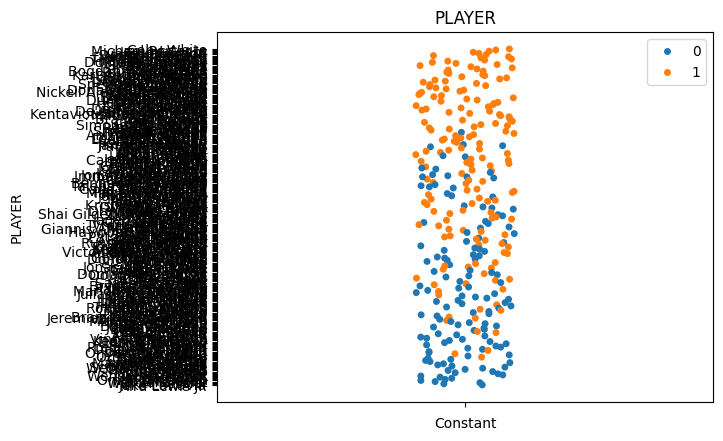

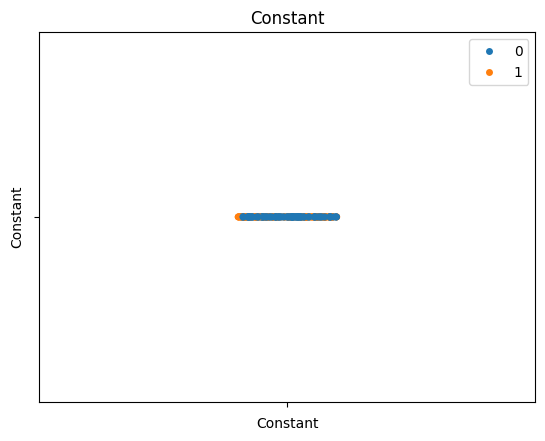

In [52]:
for key in raw_data["spot_up"].keys():
    plt.figure()
    sns.stripplot(x=raw_data_with_constant["spot_up"]['Constant'],y=raw_data_with_constant["spot_up"][key],hue=models["spot_up"].labels_,jitter=True).set(title=key)

In [53]:
#Cluster 0
print(output["spot_up"][output["spot_up"]["LABEL"] == 0]["PLAYER"])

76         Pascal Siakam
87     Jaren Jackson Jr.
88      Patrick Williams
89         Julius Randle
97         Luguentz Dort
             ...        
300          Jalen Duren
301       Markelle Fultz
302       Walker Kessler
303         Jake LaRavia
304       Kira Lewis Jr.
Name: PLAYER, Length: 134, dtype: object


In [54]:
#Cluster 1
print(output["spot_up"][output["spot_up"]["LABEL"] == 1]["PLAYER"])

1              Coby White
2      Michael Porter Jr.
3            Jerami Grant
4             Eric Gordon
5           Jalen Brunson
              ...        
256       Otto Porter Jr.
257           Jalen Smith
273          Delon Wright
276             Dru Smith
279          Bradley Beal
Name: PLAYER, Length: 170, dtype: object


In [61]:
#Get ranges of values for clusters in isolation
for label in [0, 1, 2]:
    for stat in output["isolation"].columns:
        idx_max = output["isolation"].groupby("LABEL")[stat].idxmax()
        idx_min = output["isolation"].groupby("LABEL")[stat].idxmin()
        max_rows = output["isolation"].loc[idx_max]
        min_rows = output["isolation"].loc[idx_min]
        print("Stat " + str(stat))
        print("Max: ")
        print(max_rows[["PLAYER", stat]])
        print("Min: ")
        print(min_rows[["PLAYER", stat]])
        
        

Cluster 0, stat GP_isolation
Max: 
            PLAYER  GP_isolation
31    Nikola Jokic          21.0
65  Reggie Jackson          22.0
9   Paolo Banchero          21.0
Min: 
           PLAYER  GP_isolation
57  Miles Bridges           9.0
96    CJ McCollum           8.0
47   Terry Rozier          10.0
Cluster 0, stat POSS_isolation
Max: 
             PLAYER  POSS_isolation
15  Dejounte Murray             2.4
41       Kyle Kuzma             2.4
1       Luka Doncic             6.5
Min: 
               PLAYER  POSS_isolation
79       Zach Collins             0.5
97  De'Anthony Melton             0.5
44  Russell Westbrook             2.1
Cluster 0, stat FREQ%_isolation
Max: 
             PLAYER  FREQ%_isolation
15  Dejounte Murray             11.8
91      Jaden Hardy             13.0
6   Zion Williamson             22.3
Min: 
               PLAYER  FREQ%_isolation
83   Domantas Sabonis              3.1
101    Gordon Hayward              3.5
32       Tyrese Maxey              9.4
Cluster 0, s

In [ ]:
"""
Let's try to repeat this analysis for the 2021-2022 season. We'll have more data to work with. 
We'll also be able to see how each player improves.

"""

In [ ]:
raw_data_all_sns = {"2023-24": raw_data}